# T√©cnicas de reconocimiento de patrones

La obesidad es un problema de salud p√∫blica global que se asocia con un mayor riesgo de enfermedades cr√≥nicas como diabetes, hipertensi√≥n y trastornos cardiovasculares. Su clasificaci√≥n en distintos niveles permite una mejor evaluaci√≥n del riesgo y la aplicaci√≥n de estrategias de intervenci√≥n adecuadas. En este trabajo, aplicamos modelos de aprendizaje autom√°tico para clasificar a los individuos en diferentes categor√≠as de obesidad, desde insuficiencia de peso hasta obesidad tipo III, utilizando diversas variables relacionadas con h√°bitos alimenticios, actividad f√≠sica y antecedentes familiares. A trav√©s de este enfoque, buscamos identificar los factores m√°s relevantes en la predicci√≥n de la obesidad y evaluar la eficacia de distintos algoritmos de clasificaci√≥n.

# Clasificaci√≥n de niveles de obesidad


In [ ]:
# Librer√≠as empleadas

# Bibliotecas esenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Divisi√≥n de datos y validaci√≥n
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Modelos de clasificaci√≥n
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Manejo de desequilibrio en los datos
from imblearn.over_sampling import SMOTE

# Evaluaci√≥n del modelo
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_curve, auc,
    ConfusionMatrixDisplay, precision_recall_fscore_support
)
from sklearn.inspection import permutation_importance

# Visualizaci√≥n de √°rboles de decisi√≥n
from sklearn.tree import plot_tree, export_text

from phik import phik_matrix

In [ ]:
pip install phik

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 687.8/687.8 kB 13.2 MB/s eta 0:00:00


## Cargar y estudiar el conjunto de datos:

El paquete ucimlrepo permite descargar conjuntos de datos del repositorio UCI Machine Learning autom√°ticamente.

In [ ]:
# p√°gina web del dataset:
# https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [ ]:
pip install ucimlrepo

Este conjunto de datos incluye informaci√≥n para la estimaci√≥n de los niveles de obesidad en individuos de los pa√≠ses de M√©xico, Per√∫ y Colombia, basada en sus h√°bitos alimenticios y condici√≥n f√≠sica.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
display(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

name     role         type demographic  \
0                           Gender  Feature  Categorical      Gender   
1                              Age  Feature   Continuous         Age   
2                           Height  Feature   Continuous        None   
3                           Weight  Feature   Continuous        None   
4   family_history_with_overweight  Feature       Binary        None   
5                             FAVC  Feature       Binary        None   
6                             FCVC  Feature      Integer        None   
7                              NCP  Feature   Continuous        None   
8                             CAEC  Feature  Categorical        None   
9                            SMOKE  Feature       Binary        None   
10                            CH2O  Feature   Continuous        None   
11                             SCC  Feature       Binary        None   
12                             FAF  Feature   Continuous        None   
13                             TUE  Feature      Integer        None   
14                            CALC  Feature  Categorical        None   
15                          MTRANS  Feature  Categorical        None   
16                      NObeyesdad   Target  Categorical        None   

                                          description units missing_values  
0                                                None  None             no  
1                                                None  None             no  
2                                                None  None             no  
3                                                None  None             no  
4   Has a family member suffered or suffers from o...  None             no  
5            Do you eat high caloric food frequently?  None             no  
6        Do you usually eat vegetables in your meals?  None             no  
7              How many main meals do you have daily?  None             no  
8                  Do you eat any food between meals?  None             no  
9                                       Do you smoke?  None             no  
10                 How much water do you drink daily?  None             no  
11         Do you monitor the calories you eat daily?  None             no  
12           How often do you have physical activity?  None             no  
13  How much time do you use technological devices...  None             no  
14                    How often do you drink alcohol?  None             no  
15           Which transportation do you usually use?  None             no  
16                                      Obesity level  None             no

In [ ]:
# Convertir a DataFrame
df = pd.concat([X, y], axis=1)

# Mostrar las primeras filas
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [ ]:
df.shape

(2111, 17)

Los datos contienen 17 atributos y 2111 registros.

## An√°lisis Exploratorio de Datos

Para ver todas las variables disponibles:

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Variables:

- Gender: Indica el g√©nero de la persona.
- Age: Edad de la persona en a√±os.
- Height: Altura de la persona en metros.
- Weight: Peso de la persona en kilogramos.
- family_history_with_overweight: Indica si alg√∫n miembro de la familia ha sufrido o sufre de sobrepeso.
- FAVC: Indica si la persona consume frecuentemente alimentos con alto contenido cal√≥rico.
- FCVC: Indica la frecuencia de consumo de vegetales en las comidas (n√∫mero de veces por d√≠a).
- NCP: N√∫mero de comidas principales consumidas diariamente.
- CAEC: Indica si la persona consume alimentos entre comidas.
- SMOKE: Indica si la persona fuma.
- CH2O: Cantidad de agua consumida diariamente (litros por d√≠a).
- SCC: Indica si la persona monitorea las calor√≠as que consume diariamente.
- FAF: Frecuencia de actividad f√≠sica realizada (d√≠as por semana).
- TUE: Tiempo de uso de dispositivos tecnol√≥gicos (horas por d√≠a).
- CALC: Frecuencia de consumo de alcohol.
- MTRANS: Medio de transporte que la persona utiliza habitualmente.
- NObeyesdad: Nivel de obesidad del individuo (clase de salida).

In [ ]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Vemos los valores que toma cada variable:

In [ ]:
np.set_printoptions(threshold=10, edgeitems=3, suppress=True, precision=3)

for columna in df.columns:
    valores_unicos = df[columna].unique()
    print(f"\n{columna}:")

    # Si hay m√°s de 10 valores √∫nicos, mostramos los primeros y √∫ltimos
    if len(valores_unicos) > 10:
        print(np.concatenate((valores_unicos[:5], ["..."], valores_unicos[-5:])))
    else:
        print(valores_unicos)


Gender:
['Female' 'Male']

Age:
['21.0' '23.0' '27.0' ... '22.524036' '24.361936' '23.664709']

Height:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Weight:
['64.0' '56.0' '77.0' ... '133.689352' '133.346641' '133.472641']

family_history_with_overweight:
['yes' 'no']

FAVC:
['no' 'yes']

FCVC:
['2.0' '3.0' '1.0' ... '2.801992' '2.748971' '2.680375']

NCP:
['3.0' '1.0' '4.0' ... '1.343117' '1.213431' '1.089048']

CAEC:
['Sometimes' 'Frequently' 'Always' 'no']

SMOKE:
['no' 'yes']

CH2O:
['2.0' '3.0' '1.0' ... '2.054193' '2.852339' '2.863513']

SCC:
['no' 'yes']

FAF:
['0.0' '3.0' '2.0' ... '1.414209' '1.139107' '1.026452']

TUE:
['1.0' '0.0' '2.0' ... '0.646288' '0.586035' '0.714137']

CALC:
['no' 'Sometimes' 'Frequently' 'Always']

MTRANS:
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

NObeyesdad:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Hacemos un an√°lisis de correlaci√≥n de variables, mediante la matriz de correlaci√≥n:

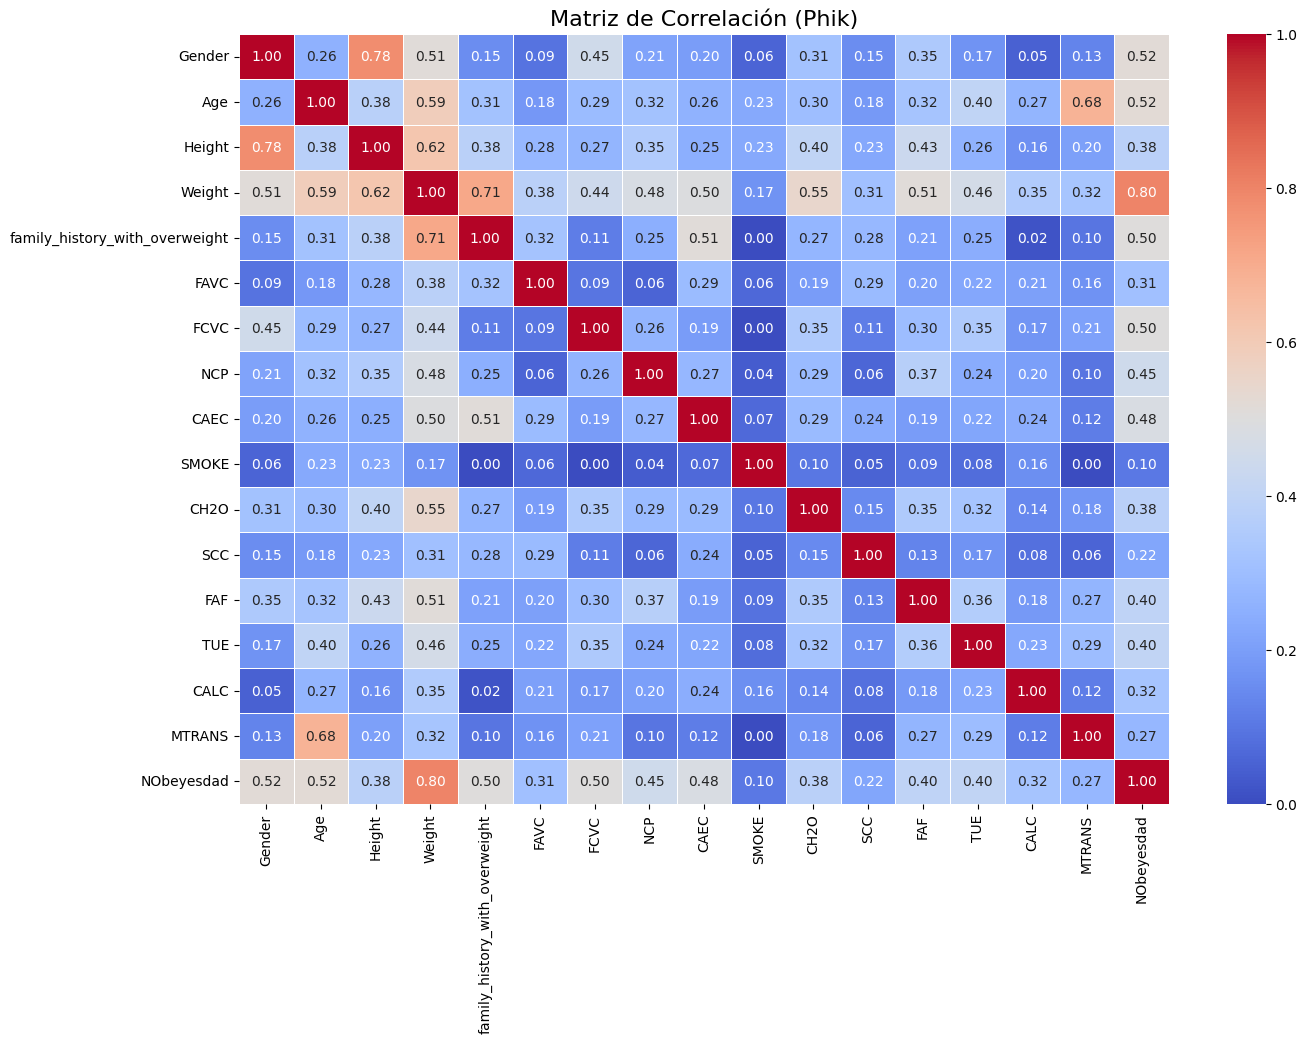

In [ ]:
# Calcular la matriz de correlaci√≥n
correlation_matrix = df.phik_matrix(interval_cols=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])

# Crear un mapa de calor con valores de correlaci√≥n
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Matriz de Correlaci√≥n (Phik)', fontsize=16)
plt.show()

- Weight y Height (0.62): Correlaci√≥n moderadamente alta, lo cual es l√≥gico ya que el peso suele depender de la altura. Sin embargo, es importante mantener ambas porque ambas aportan informaci√≥n para la variable objetivo.
- Weight y family_history_with_overweight (0.71): Existe una relaci√≥n moderada que podr√≠a sugerir una influencia gen√©tica, aunque esto no significa necesariamente que sean variables redundantes.
- Weight y NObeyesdad (0.80): Muy alta, lo cual tiene sentido, ya que el peso es un factor clave para determinar el nivel de obesidad. Esta relaci√≥n fuerte confirma la importancia de esta variable para el modelo.
- Age y MTRANS (0.68): Esto podr√≠a indicar que ciertos modos de transporte se asocian con ciertos grupos de edad.
- NObeyesdad y Smoke (0.10): muy baja, en esta base de datos el h√°bito de fumar no est√° apenas relacionado con la obesidad

Previamente a aplicar los modelos de clasificaci√≥n, observamos si los datos est√°n balanceados. Para ello analizamos la frecuencia de cada categor√≠a de la variable objetivo `NObeyesdad`.

Aunque el conjunto de datos original contaba con 498 participantes. Los creadores del dataset al analizar los niveles de obesidad de los participantes, determinaron que exist√≠a much√≠simo desbalance de clases. Dado que los algoritmos de aprendizaje autom√°tico pueden generar resultados sesgados en conjuntos de datos con problemas de desbalanceo, aplicaron la t√©cnica Synthetic Minority Over-sampling Technique-Nominal Continuous (SMOTE-NC) para reducir este problema. Esta t√©cnica de sobreentrenamiento es una extensi√≥n del algoritmo original SMOTE, dise√±ada espec√≠ficamente para manejar conjuntos de datos que contienen tanto caracter√≠sticas nominales como continuas.

Como resultado, obtuvieron un conjunto de datos con 2111 muestras y 16 caracter√≠sticas (feautures) (adem√°s de la variable objetivo), que es el que utilizaremos en este trabajo.

<ipython-input-11-dfa99e9827ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


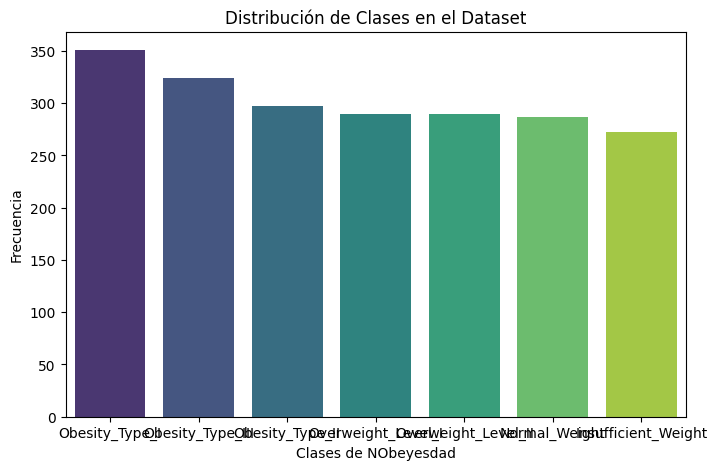

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [ ]:
# Contar la frecuencia de cada clase en 'NObeyesdad'
class_counts = df['NObeyesdad'].value_counts()

# Visualizar la distribuci√≥n
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Clases de NObeyesdad")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de Clases en el Dataset")
plt.show()

# Mostrar el conteo de clases
class_counts

Observamos que los datos no est√°n desbalanceados, ya que todas las clases tienen una cantidad similar de muestras (entre 272 y 348 observaciones por clase).  

## Preprocesamiento de Datos

### Manejo de Valores At√≠picos

Variables categ√≥ricas: gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS

Variables num√©ricas (continuas): age, height, weight, FCVC, NCP, CH2O, FAF, TUE

Comenzamos con el estudio de los valores at√≠picos para las variables categ√≥ricas, donde vamos a considerar outliers aquellas categor√≠as inusuales o con frecuencias extremadamente bajas.


--- Estudio de Valores At√≠picos en Variables Categ√≥ricas ---

Gender:
Gender
Male      50.592136
Female    49.407864
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


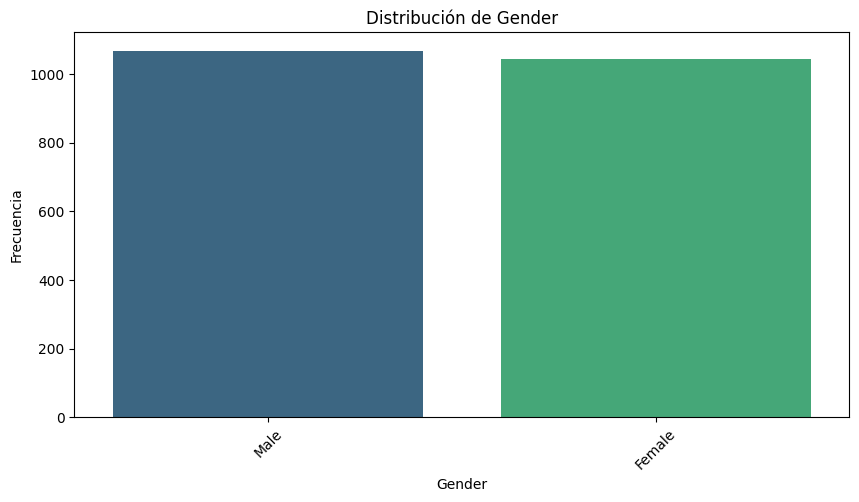


family_history_with_overweight:
family_history_with_overweight
yes    81.762198
no     18.237802
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


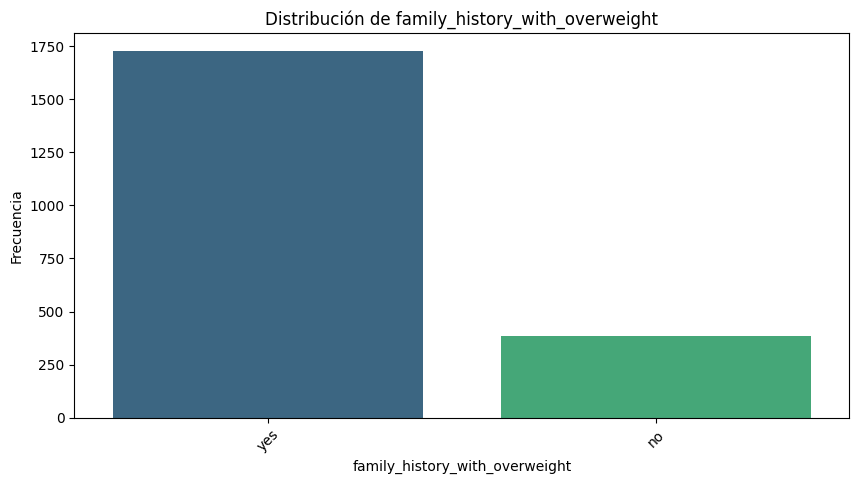


FAVC:
FAVC
yes    88.394126
no     11.605874
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


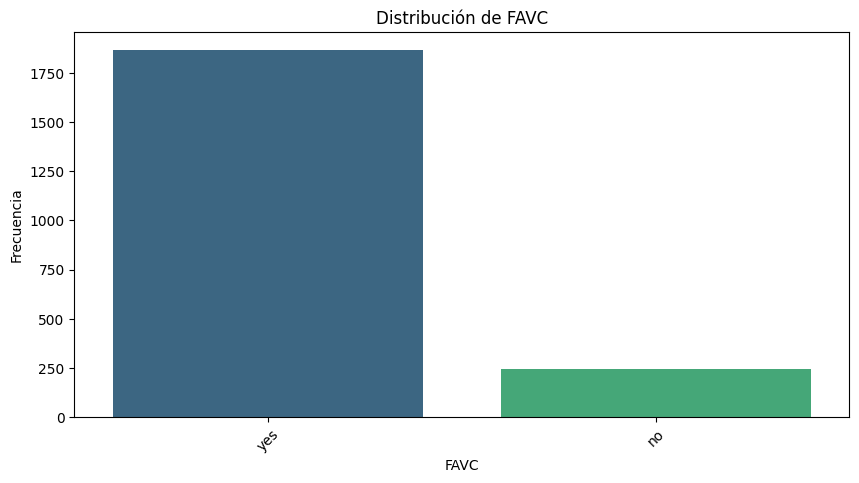


CAEC:
CAEC
Sometimes     83.609664
Frequently    11.463761
Always         2.510658
no             2.415917
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


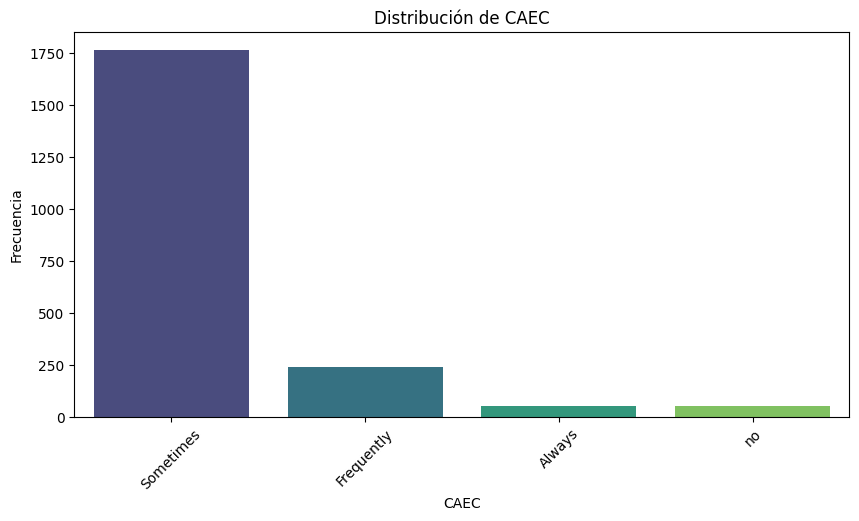


SCC:
SCC
no     95.452392
yes     4.547608
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


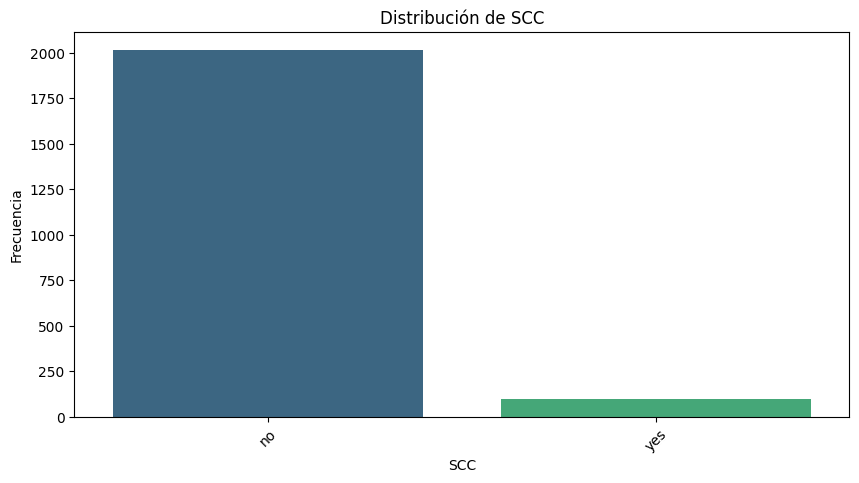


CALC:
CALC
Sometimes     66.366651
no            30.270014
Frequently     3.315964
Always         0.047371
Name: proportion, dtype: float64

Outliers detectados (frecuencia < 1%):
CALC
Always    0.047371
Name: proportion, dtype: float64


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


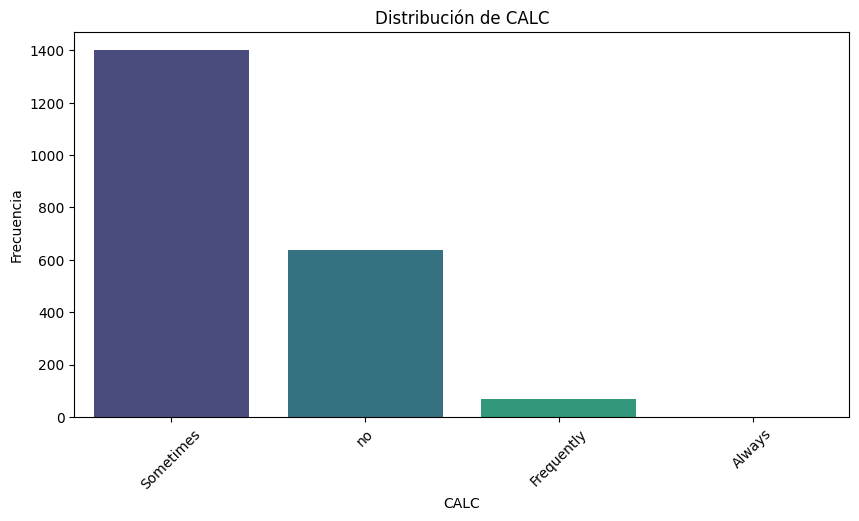


MTRANS:
MTRANS
Public_Transportation    74.846045
Automobile               21.648508
Walking                   2.652771
Motorbike                 0.521080
Bike                      0.331596
Name: proportion, dtype: float64

Outliers detectados (frecuencia < 1%):
MTRANS
Motorbike    0.521080
Bike         0.331596
Name: proportion, dtype: float64


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


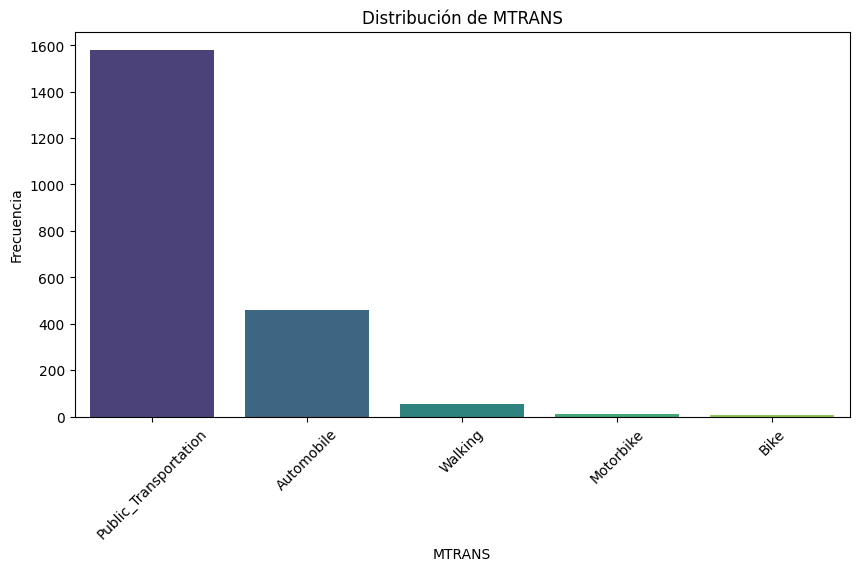


SMOKE:
SMOKE
no     97.91568
yes     2.08432
Name: proportion, dtype: float64
No se detectaron outliers (frecuencia < 1%)


<ipython-input-13-0c285afc924f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %


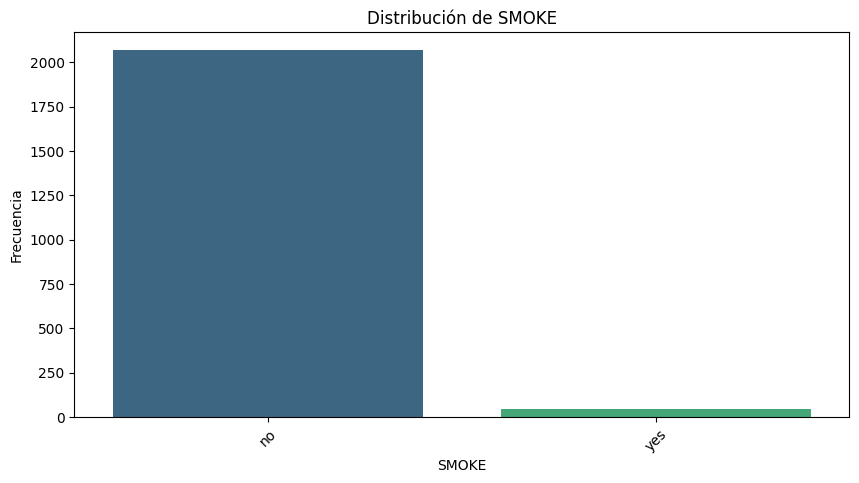

In [ ]:
# Listado de variables categ√≥ricas a analizar
categoricas = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC', 'MTRANS', 'SMOKE']

print("\n--- Estudio de Valores At√≠picos en Variables Categ√≥ricas ---")
for col in categoricas:
    print(f"\n{col}:")

    # Calcular la frecuencia de cada categor√≠a
    frecuencias = df[col].value_counts(normalize=True) * 100
    print(frecuencias)

    # Identificar categor√≠as con frecuencias menores al 1%
    outliers = frecuencias[frecuencias < 1]
    if not outliers.empty:
        print(f"\nOutliers detectados (frecuencia < 1%):")
        print(outliers)
    else:
        print("No se detectaron outliers (frecuencia < 1%)")

    # Visualizar distribuci√≥n con un gr√°fico de barras
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col], order=frecuencias.index, palette="viridis") #a lo mejor es mejor pintar directamente las frecuencias en %
    plt.title(f'Distribuci√≥n de {col}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

- Gender: podemos observar que la distribuci√≥n es bastante equilibrada entre ambos g√©neros.
- family_history_with_overweight: la mayor√≠a tienen antecedentes familiares con sobrepeso, lo cual es considerable en un estudio sobre obesidad.
- FAVC: la mayor√≠a consume alimentos altos en calor√≠as, relevante para nuestro estudio.
- CAEC: La categor√≠a "No" tiene baja frecuencia, pero no llega a considerarse outlier (no llega a ser menor al 1%).
- SMOKE: La mayor√≠a no fuma, esto puede ser relevante para analizar su impacto en la obesidad.
- SCC: La mayor√≠a no controla su ingesta cal√≥rica, lo cual es consistente con un estudio sobre obesidad.

Outliers:

- CALC (Consumo de alcohol): La categor√≠a "Always" tiene una frecuencia extremadamente baja. Por lo que decidimos agruparla con otra categor√≠a ("Frequently").
- MTRANS (Transporte habitual): Las categor√≠as "Motorbike" y "Bike" tienen frecuencias muy bajas. Por ello, decicimos agruparlas en una categor√≠a llamada "Otros".


--- Distribuci√≥n actualizada de CALC ---
CALC
Sometimes     66.366651
no            30.270014
Frequently     3.363335
Name: proportion, dtype: float64


<ipython-input-14-46b98e304e2b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['CALC'], palette="viridis")


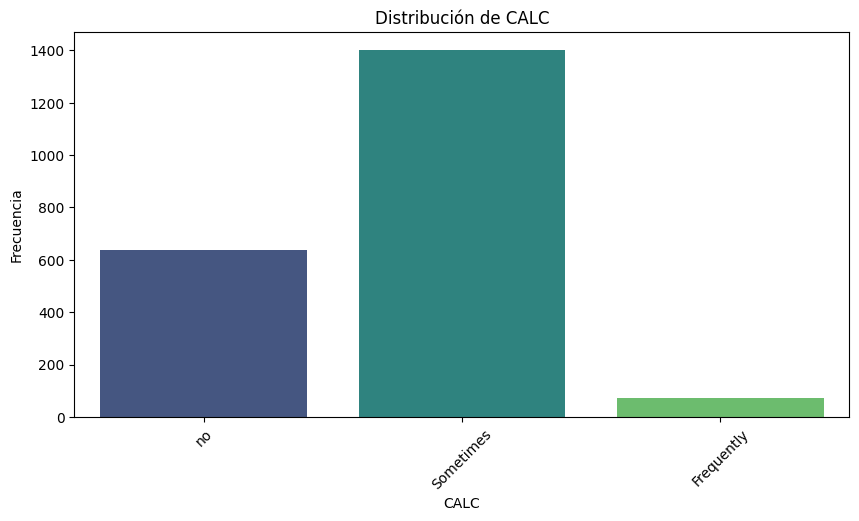

In [ ]:
# Agrupar la categor√≠a 'Always' con 'Frequently' en la columna 'CALC'
df['CALC'] = df['CALC'].replace({'Always': 'Frequently'})

# Verificar el cambio
print("\n--- Distribuci√≥n actualizada de CALC ---")
print(df['CALC'].value_counts(normalize=True) * 100)

# Visualizar la distribuci√≥n actualizada con un gr√°fico de barras
plt.figure(figsize=(10, 5))
sns.countplot(x=df['CALC'], palette="viridis")
plt.title('Distribuci√≥n de CALC')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


--- Distribuci√≥n actualizada de MTRANS ---
MTRANS
Public_Transportation    74.846045
Automobile               21.648508
Walking                   2.652771
Otros                     0.852676
Name: proportion, dtype: float64


<ipython-input-15-bafd5d0a18a4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['MTRANS'], palette="viridis")


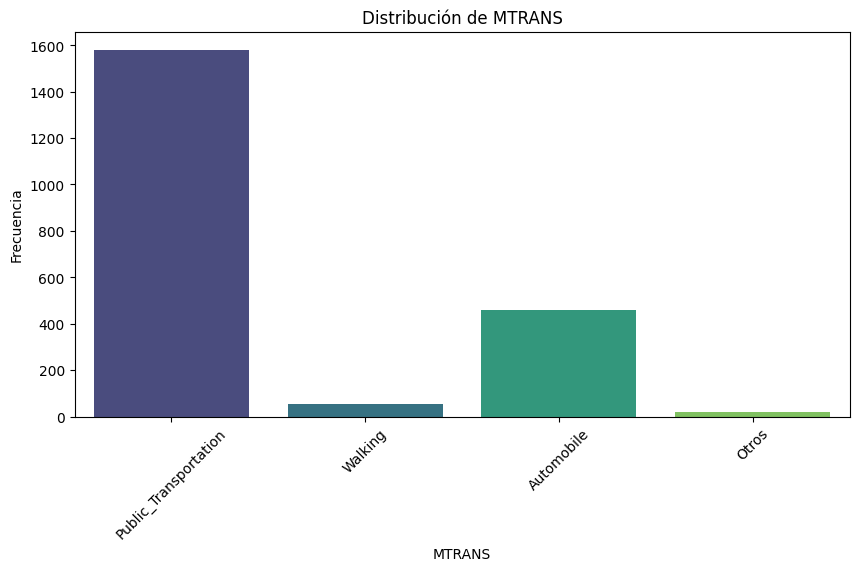

In [ ]:
# Agrupar las categor√≠as 'Motorbike' y 'Bike' en una nueva categor√≠a 'Otros' en la columna 'MTRANS'
df['MTRANS'] = df['MTRANS'].replace({'Motorbike': 'Otros', 'Bike': 'Otros'})

# Verificar el cambio
print("\n--- Distribuci√≥n actualizada de MTRANS ---")
print(df['MTRANS'].value_counts(normalize=True) * 100)

# Visualizar la distribuci√≥n actualizada con un gr√°fico de barras
plt.figure(figsize=(10, 5))
sns.countplot(x=df['MTRANS'], palette="viridis")
plt.title('Distribuci√≥n de MTRANS')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Comprobar valores at√≠picos en la columna 'CALC'
print("\n--- Verificaci√≥n de Valores At√≠picos en CALC ---")
frecuencias_calc = df['CALC'].value_counts(normalize=True) * 100
print(frecuencias_calc)

# Identificar posibles valores at√≠picos en 'CALC' (frecuencia < 1%)
outliers_calc = frecuencias_calc[frecuencias_calc < 1]
if not outliers_calc.empty:
    print(f"\nValores at√≠picos en CALC (frecuencia < 1%):")
    print(outliers_calc)
else:
    print("No se detectaron valores at√≠picos en CALC (frecuencia < 1%)")

# Comprobar valores at√≠picos en la columna 'MTRANS'
print("\n--- Verificaci√≥n de Valores At√≠picos en MTRANS ---")
frecuencias_mtrans = df['MTRANS'].value_counts(normalize=True) * 100
print(frecuencias_mtrans)

# Identificar posibles valores at√≠picos en 'MTRANS' (frecuencia < 1%)
outliers_mtrans = frecuencias_mtrans[frecuencias_mtrans < 1]
if not outliers_mtrans.empty:
    print(f"\nValores at√≠picos en MTRANS (frecuencia < 1%):")
    print(outliers_mtrans)
else:
    print("No se detectaron valores at√≠picos en MTRANS (frecuencia < 1%)")


--- Verificaci√≥n de Valores At√≠picos en CALC ---
CALC
Sometimes     66.366651
no            30.270014
Frequently     3.363335
Name: proportion, dtype: float64
No se detectaron valores at√≠picos en CALC (frecuencia < 1%)

--- Verificaci√≥n de Valores At√≠picos en MTRANS ---
MTRANS
Public_Transportation    74.846045
Automobile               21.648508
Walking                   2.652771
Otros                     0.852676
Name: proportion, dtype: float64

Valores at√≠picos en MTRANS (frecuencia < 1%):
MTRANS
Otros    0.852676
Name: proportion, dtype: float64



--- Distribuci√≥n de MTRANS despu√©s de eliminar 'Otros' ---
MTRANS
Public_Transportation    75.489728
Automobile               21.834687
Walking                   2.675585
Name: proportion, dtype: float64


<ipython-input-17-78bfdde565c6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['MTRANS'], palette="viridis")


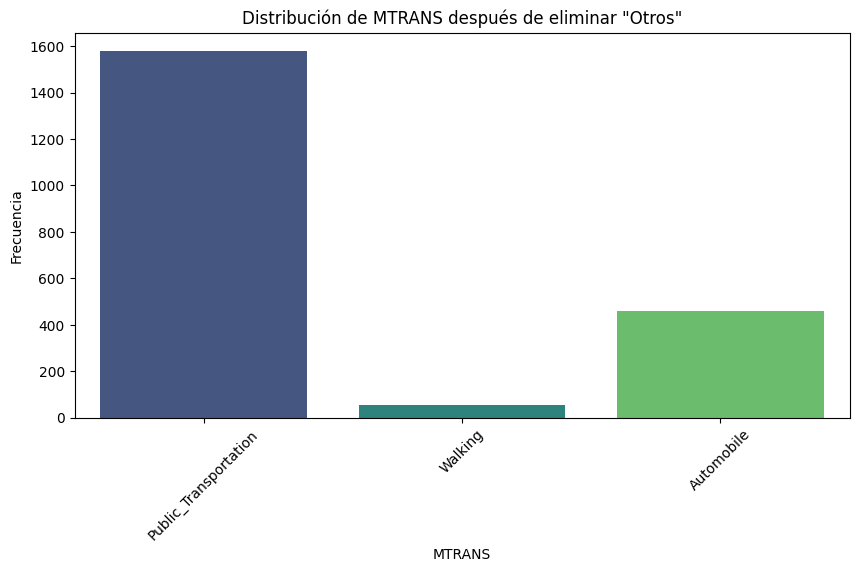

In [ ]:
# Eliminar la categor√≠a 'Otros' de la columna 'MTRANS'
df = df[df['MTRANS'] != 'Otros']

# Verificar la distribuci√≥n despu√©s de eliminar 'Otros'
print("\n--- Distribuci√≥n de MTRANS despu√©s de eliminar 'Otros' ---")
print(df['MTRANS'].value_counts(normalize=True) * 100)

# Visualizar la distribuci√≥n actualizada con un gr√°fico de barras
plt.figure(figsize=(10, 5))
sns.countplot(x=df['MTRANS'], palette="viridis")
plt.title('Distribuci√≥n de MTRANS despu√©s de eliminar "Otros"')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Continuamos con el estudio de valores at√≠picos para las variables num√©ricas (continuas): age, height, weight, FCVC, NCP, CH2O, FAF, TUE. Para ello, vamos a utilizar m√©todos estad√≠sticos como el IQR (Interquartile Range) o los Boxplots para identificar outliers.


--- Estudio de Valores At√≠picos en Variables Continuas ---

Age:

Valores at√≠picos detectados en Age(165): 
            Age
13    41.000000
21    52.000000
33    39.000000
92    55.000000
104   38.000000
...         ...
1740  37.765356
1775  37.207082
1776  38.108940
1777  38.644441
1778  38.112989

[165 rows x 1 columns]


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


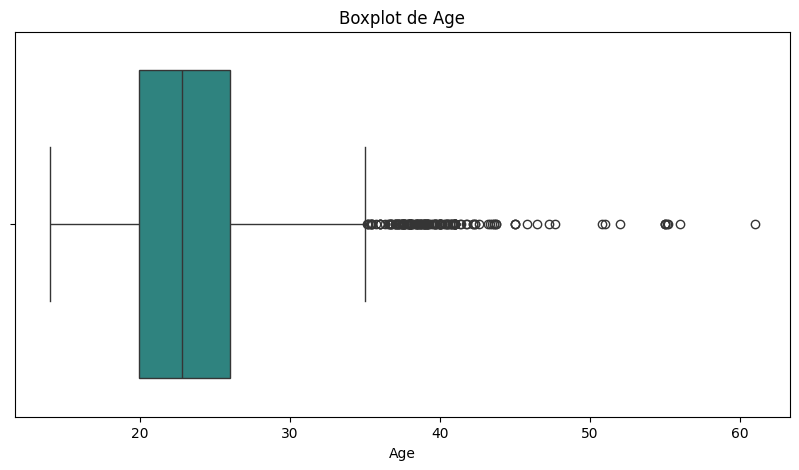


Height:

Valores at√≠picos detectados en Height(2): 
        Height
349   1.980000
1350  1.975663


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


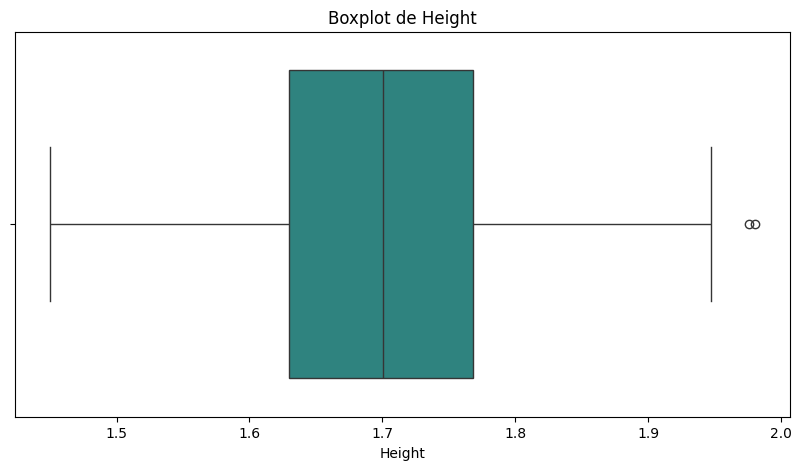


Weight:

Valores at√≠picos detectados en Weight(1): 
     Weight
344   173.0


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


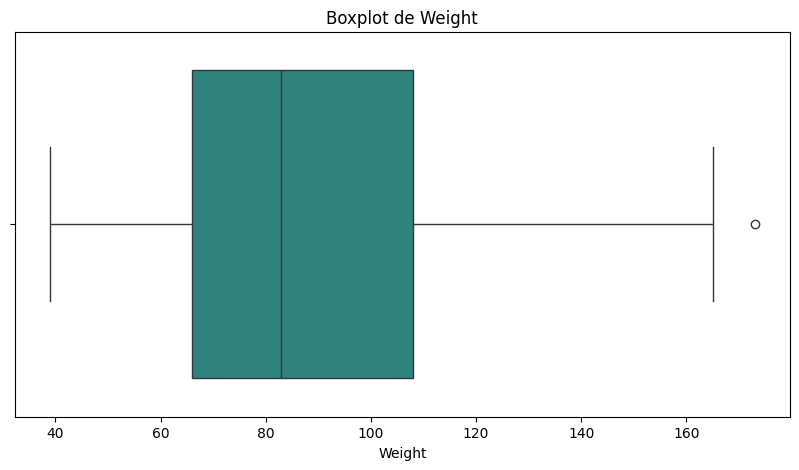


FCVC:
No se detectaron valores at√≠picos en FCVC


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


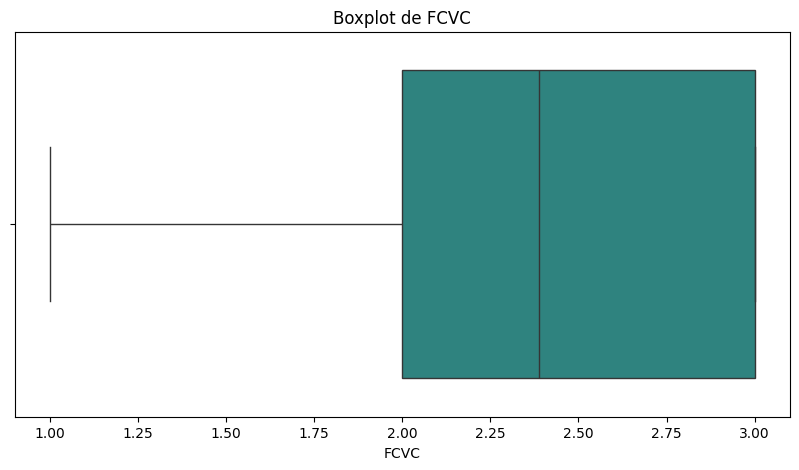


NCP:

Valores at√≠picos detectados en NCP(576): 
           NCP
4     1.000000
14    1.000000
16    1.000000
17    1.000000
18    4.000000
...        ...
1794  2.142328
1795  1.437959
1796  1.343117
1797  1.213431
1798  1.089048

[576 rows x 1 columns]


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


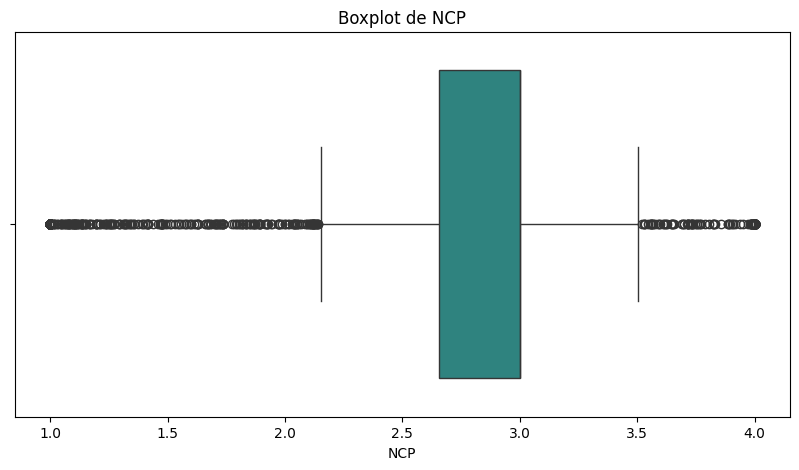


CH2O:
No se detectaron valores at√≠picos en CH2O


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


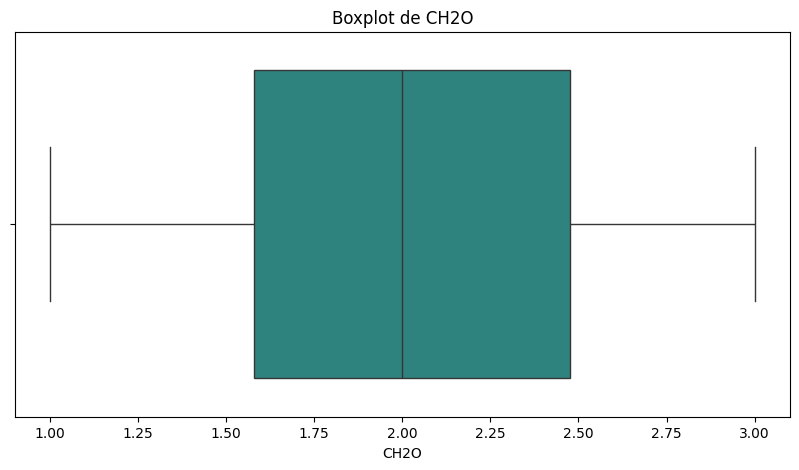


FAF:
No se detectaron valores at√≠picos en FAF


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


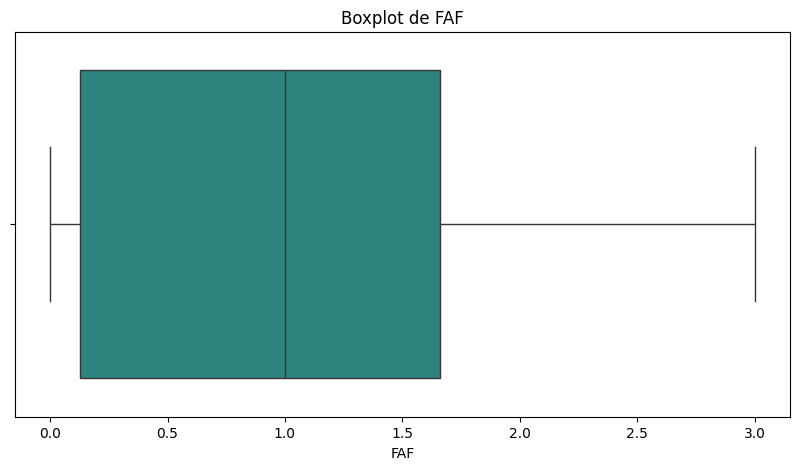


TUE:
No se detectaron valores at√≠picos en TUE


<ipython-input-18-1031fed3eeda>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="viridis")


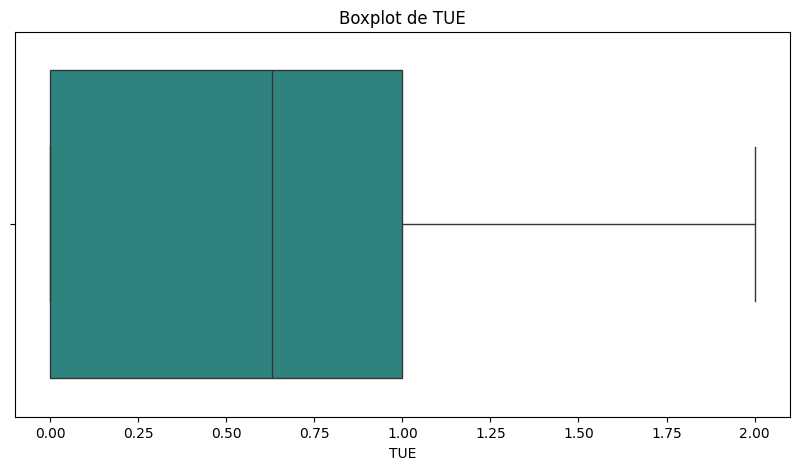

In [ ]:
# Lista de variables continuas
continuas = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

print("\n--- Estudio de Valores At√≠picos en Variables Continuas ---")
for col in continuas:
    print(f"\n{col}:")

    # Calcular Q1 (primer cuartil), Q3 (tercer cuartil) y el IQR (rango intercuart√≠lico)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los l√≠mites para los valores at√≠picos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar los valores at√≠picos
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]

    # Mostrar los valores at√≠picos
    if not outliers.empty:
        print(f"\nValores at√≠picos detectados en {col}({len(outliers[[col]])}): ")
        print(outliers[[col]] )
    else:
        print(f"No se detectaron valores at√≠picos en {col}")

    # Visualizar la distribuci√≥n de la variable con un gr√°fico de caja (boxplot)
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col], palette="viridis")
    plt.title(f'Boxplot de {col}')
    plt.show()

Variables sin valores at√≠picos:
- FCVC, CH2O, FAF, TUE: No se detectaron valores at√≠picos.

Variables con valores at√≠picos:
- Age: Se encontraron 165 valores at√≠picos.
- Height: Se detectaron 2 valores at√≠picos.
- Weight: Se encontr√≥ 1 valor at√≠pico.
- NCP: Se detectaron 576 valores at√≠picos.

In [ ]:
# Variables con valores at√≠picos
variables_atipicas = ['Age', 'Height', 'Weight', 'NCP']

print("\n--- Estad√≠sticos Descriptivos de Variables con Valores At√≠picos ---")
for col in variables_atipicas:
    print(f"\n{col}:")

    # Calcular los estad√≠sticos descriptivos
    stats = df[col].describe()
    print(stats)


--- Estad√≠sticos Descriptivos de Variables con Valores At√≠picos ---

Age:
count    2093.000000
mean       24.301910
std         6.333014
min        14.000000
25%        19.946244
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

Height:
count    2093.000000
mean        1.701591
std         0.093229
min         1.450000
25%         1.630000
50%         1.700181
75%         1.768235
max         1.980000
Name: Height, dtype: float64

Weight:
count    2093.000000
mean       86.689999
std        26.239812
min        39.000000
25%        65.912688
50%        83.000000
75%       107.998815
max       173.000000
Name: Weight, dtype: float64

NCP:
count    2093.000000
mean        2.684358
std         0.778653
min         1.000000
25%         2.657720
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64


- Age: La edad est√° en un rango l√≥gico, entre 14 y 61 a√±os. Aunque algunos valores pueden ser considerados at√≠picos, no est√°n fuera del rango l√≥gico.
- Height: La altura tambi√©n est√° en un rango razonable, ya que el m√≠nimo es 1.45 metro y el m√°ximo es 1.98 metros.
- Weight: El peso tambi√©n se encuentra en un rango adecuado, con el m√≠nimo en 39 kg y el m√°ximo en 173 kg (que es alto, pero es razonable en nuestro estudio).
- NCP (N√∫mero de comidas principales consumidas diariamente): Los valores est√°n dentro de un rango esperado, con un m√≠nimo de 1 comida y un m√°ximo de 4.

Por tanto, concluimos que estos valores at√≠picos representan casos menos frecuentes, pero no necesariamente un error de medici√≥n o de registro.

### Manejo de Valores Nulos

In [ ]:
# Verificar valores nulos
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No hay valores nulos.

### Codificaci√≥n de Variables Categ√≥ricas

Vamos a aplicar la codificaci√≥n de Etiquetas (Label Encoding) para las variables cuyas categor√≠as tienen un orden natural. En nuestro caso son:
- 'CAEC'(Indica si la persona consume alimentos entre comidas) con categor√≠as: 'no', 'sometimes', 'frequently', 'always'.
- 'CALC'(frecuencia de consumo de alcohol) con categor√≠as: 'no', 'sometimes', 'frequently'.

Para el resto de variables, donde no tenemos un orden espec√≠fico, aplicaremos la codificaci√≥n One-Hot (One-Hot Encoding). En nuestro caso son: 'Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS'.


In [ ]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2093 rows x 17 columns]

In [ ]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         348
Obesity_Type_III       324
Obesity_Type_II        296
Overweight_Level_II    289
Overweight_Level_I     287
Normal_Weight          277
Insufficient_Weight    272
Name: count, dtype: int64

In [ ]:
nominal_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SCC', 'SMOKE', 'MTRANS']

# Codificaci√≥n One-Hot para variables nominales
df_nominal_encoded = pd.get_dummies(df[nominal_columns], drop_first=True)

# Convertir a 0 y 1 expl√≠citamente
df_nominal_encoded = df_nominal_encoded.astype(int)

# Diccionarios para variables ordinales
ordinal_mappings = {
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'NObeyesdad': {
        'Insufficient_Weight': 0,
        'Normal_Weight': 1,
        'Overweight_Level_I': 2,
        'Overweight_Level_II': 3,
        'Obesity_Type_I': 4,
        'Obesity_Type_II': 5,
        'Obesity_Type_III': 6
    }
}

# Aplicar el mapeo a cada columna ordinal
for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Combinar el DataFrame original con las columnas codificadas
df = pd.concat([df.drop(columns=nominal_columns), df_nominal_encoded], axis=1)

display(df.head())

Age  Height  Weight  FCVC  NCP  CAEC  CH2O  FAF  TUE  CALC  NObeyesdad  \
0  21.0    1.62    64.0   2.0  3.0     1   2.0  0.0  1.0     0           1   
1  21.0    1.52    56.0   3.0  3.0     1   3.0  3.0  0.0     1           1   
2  23.0    1.80    77.0   2.0  3.0     1   2.0  2.0  1.0     2           1   
3  27.0    1.80    87.0   3.0  3.0     1   2.0  2.0  0.0     2           2   
4  22.0    1.78    89.8   2.0  1.0     1   2.0  0.0  0.0     1           3   

   Gender_Male  family_history_with_overweight_yes  FAVC_yes  SCC_yes  \
0            0                                   1         0        0   
1            0                                   1         0        1   
2            1                                   1         0        0   
3            1                                   0         0        0   
4            1                                   0         0        0   

   SMOKE_yes  MTRANS_Public_Transportation  MTRANS_Walking  
0          0                             1               0  
1          1                             1               0  
2          0                             1               0  
3          0                             0               1  
4          0                             1               0

# Modelado: Comparaci√≥n de modelos no lineales

In [ ]:
# Separar caracter√≠sticas (X) y variable objetivo (y)
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']  # Es una sola columna con valores enteros (los codificados)

En este paso, utilizamos la t√©cnica de An√°lisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos de un espacio multidimensional a dos dimensiones. Esta t√©cnica transforma las caracter√≠sticas originales en un nuevo conjunto de variables ortogonales (componentes principales), ordenadas por la cantidad de varianza que explican en los datos. Al proyectar nuestros datos a dos dimensiones, podemos graficarlos, lo que nos permite observar si los datos tienen una estructura clara o no. Observamos que las clases aparecen bastante mezcladas, lo que nos sugiere utilizar m√©todos de clasificaci√≥n m√°s flexibles, como los no lineales. Esta visualizaci√≥n es √∫til para comprender mejor la estructura de los datos antes de aplicar modelos m√°s complejos, como los SVM con kernels no lineales.

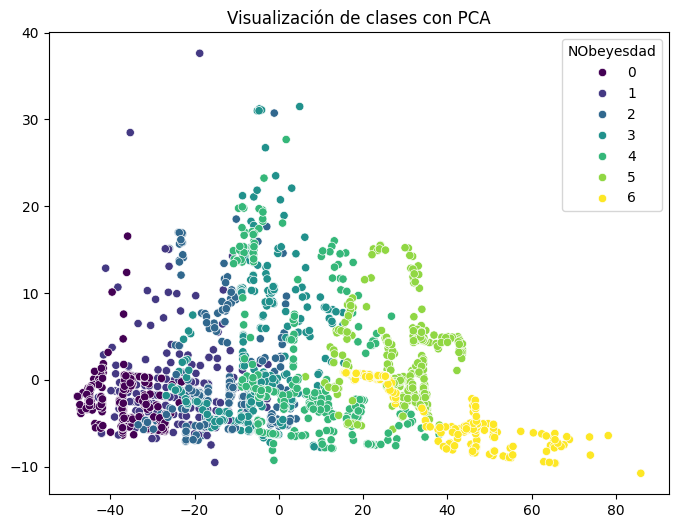

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(columns=['NObeyesdad']))  # Excluyendo la variable objetivo

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['NObeyesdad'], palette='viridis')
plt.title("Visualizaci√≥n de clases con PCA")
plt.show()

A continuaci√≥n, separamos los datos en tres conjuntos: el conjunto de entrenamiento, que utilizaremos para entrenar el modelo; el conjunto de validaci√≥n, que nos permitir√° ajustar los hiperpar√°metros y evaluar el rendimiento del modelo durante el entrenamiento; y el conjunto de prueba, que utilizaremos para evaluar la capacidad de generalizaci√≥n del modelo y su desempe√±o final en datos no vistos.

In [ ]:
# Dividir en entrenamiento (70%), validaci√≥n (15%) y prueba (15%)

# Dividimos en entrenamiento (70%) y otro 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # conjunto de entrenamiento

#Dividimos el segundo conjunto(30%) en un 15% para validaci√≥n y un 15% para test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) # conjuntos de validaci√≥n y prueba

# Escalar solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#-  SVM NO LINEAL con todas las features

El modelo SVM no lineal utiliza el kernel RBF (Radial Basis Function) para manejar problemas donde las clases no son separables linealmente. Este kernel mapea las entradas a un espacio de mayor dimensi√≥n, facilitando la separaci√≥n de clases de manera efectiva. La funci√≥n del kernel RBF se expresa como:

$K(x, x') = exp(- ||x - x'||^2 / (2 \cdot \sigma^2))$

Donde:
- x y x' son dos vectores de entrada (puntos de datos),
- $\sigma$ es un par√°metro que controla la amplitud de la funci√≥n de similitud,
- ||x - x'|| es la distancia euclidiana entre los puntos x y x'.

El kernel RBF es √∫til para problemas de clasificaci√≥n complejos con fronteras de decisi√≥n no lineales, ya que permite separar las clases de manera m√°s efectiva que los modelos lineales.


In [ ]:
# Crear y entrenar el modelo SVM con kernel RBF
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

train_accuracies = []
val_accuracies = []

# Entrenar el modelo con diferentes tama√±os de datos para visualizar la curva de aprendizaje
for frac in np.linspace(0.1, 1.0, 10):
    X_train_frac = X_train_scaled[:int(frac * len(X_train_scaled))]
    y_train_frac = y_train[:int(frac * len(y_train))]

    # Entrenamiento inicial con el conjunto de entrenamiento
    svm_model.fit(X_train_frac, y_train_frac)

    # Evaluar en entrenamiento y validaci√≥n
    train_acc = accuracy_score(y_train_frac, svm_model.predict(X_train_frac))
    val_acc = accuracy_score(y_val, svm_model.predict(X_val_scaled))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Evaluar el modelo final

# Entrenar con el conjunto completo de entrenamiento y validaci√≥n
X_train_val = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

svm_model.fit(X_train_val, y_train_val)

# Evaluaci√≥n final en el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)
print("Clasificaci√≥n del Test Set:\n", classification_report(y_test, y_pred))

Clasificaci√≥n del Test Set:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.70      0.74      0.72        42
           2       0.81      0.79      0.80        43
           3       0.84      0.86      0.85        43
           4       1.00      0.96      0.98        52
           5       0.98      0.98      0.98        45
           6       1.00      1.00      1.00        48

    accuracy                           0.89       314
   macro avg       0.89      0.89      0.89       314
weighted avg       0.90      0.89      0.90       314



Los resultados indican que el modelo SVM con kernel RBF est√° funcionando bastante bien en general, con una exactitud del 89%.

- Desempe√±o general: el modelo tiene un buen rendimiento global (accuracy = 0.89), lo que sugiere que est√° clasificando correctamente la mayor√≠a de los casos.
El F1-score macro y weighted avg son 0.89 y 0.90, lo que indica que el modelo mantiene un rendimiento consistente en todas las clases.

- Clases con mejor desempe√±o: La clase 6 (F1-score = 1.00) y las clases 4 y 5 (F1-score = 0.98) son las mejor clasificadas, lo que sugiere que el modelo distingue muy bien estas categor√≠as.

- Clases con menor desempe√±o: La clase 1 (F1-score = 0.72) tiene el rendimiento m√°s bajo, con un recall de 0.74, lo que indica que el modelo no est√° identificando correctamente algunos casos de esta clase. La clase 2 (F1-score = 0.80) tambi√©n muestra un rendimiento m√°s bajo en comparaci√≥n con las dem√°s, aunque sigue siendo aceptable.

En general, el modelo tiene un buen desempe√±o, aunque mejorar la clasificaci√≥n de la clase 1 podr√≠a ayudar a equilibrar a√∫n m√°s los resultados.




In [ ]:
# Evaluaci√≥n en el conjunto de entrenamiento + validaci√≥n
train_val_acc = svm_model.score(X_train_val, y_train_val)

# Evaluaci√≥n en el conjunto de prueba
test_acc = svm_model.score(X_test_scaled, y_test)

# Imprimir los resultados
print(f"Train + Validation Accuracy: {train_val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Generar las predicciones para el conjunto de entrenamiento + validaci√≥n
y_train_val_pred = svm_model.predict(X_train_val)

# Generar las predicciones para el conjunto de prueba
y_test_pred = svm_model.predict(X_test_scaled)

# Calcular el F1 score en el conjunto de entrenamiento + validaci√≥n
f1_train_val = f1_score(y_train_val, y_train_val_pred, average='weighted')  # 'weighted' es √∫til si las clases est√°n desbalanceadas

# Calcular el F1 score en el conjunto de prueba
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados del F1 score
print(f"Train + Validation F1 Score: {f1_train_val:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

Train + Validation Accuracy: 0.9427
Test Accuracy: 0.8949
Train + Validation F1 Score: 0.9430
Test F1 Score: 0.8957


El modelo SVM ha logrado una alta precisi√≥n en la clasificaci√≥n de niveles de obesidad, con un 94.27% de precisi√≥n en entrenamiento + validaci√≥n y un 89.49% en prueba, lo que indica una buena capacidad de generalizaci√≥n con una ligera diferencia entre ambos conjuntos. El F1-score tambi√©n muestra valores similares, sugiriendo un equilibrio entre precisi√≥n y recall.


El modelo SVC tiene dos hiperpar√°metros clave en el kernel RBF que podemos ajustar para mejorar la clasificaci√≥n:

- C (regularizaci√≥n): Controla cu√°nto permitimos que el modelo aprenda de los datos. Valores altos pueden llevar a sobreajuste, mientras que valores bajos pueden dar un modelo muy simple.
- gamma (ùõæ, coeficiente del kernel RBF): Determina la influencia de cada punto en la clasificaci√≥n. Valores altos hacen que el modelo se enfoque en puntos individuales (sobreajuste), mientras que valores bajos hacen que sea m√°s general.

Para encontrar los mejores valores de C y gamma, usaremos GridSearchCV, que hace validaci√≥n cruzada probando varias combinaciones:

Mejores hiperpar√°metros: {'C': 100, 'gamma': 0.01}


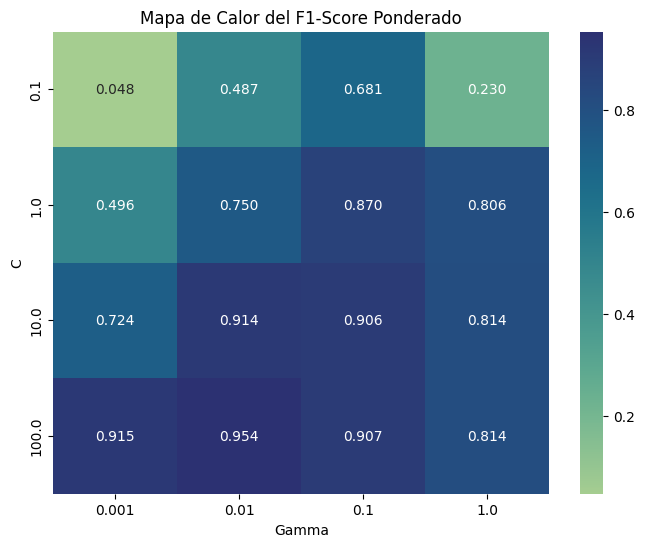

Cross-validation F1 Score (promedio): 0.9532
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.91      0.93      0.92        42
           2       0.89      0.93      0.91        43
           3       0.95      0.93      0.94        43
           4       1.00      0.98      0.99        52
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        48

    accuracy                           0.96       314
   macro avg       0.96      0.96      0.96       314
weighted avg       0.96      0.96      0.96       314



In [ ]:
# Definir el modelo SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Definir los valores de hiperpar√°metros a probar
param_grid = {
    'C': [0.1, 1, 10, 100],  # Valores peque√±os -> modelo simple, grandes -> modelo m√°s complejo
    'gamma': [0.001, 0.01, 0.1, 1]  # Valores peque√±os -> m√°s general, grandes -> m√°s sensible
}

# Validaci√≥n cruzada con GridSearch en el conjunto de entrenamiento (sin incluir validaci√≥n a√∫n)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperpar√°metros encontrados
best_params = grid_search.best_params_
print("Mejores hiperpar√°metros:", best_params)

# Representar la evoluci√≥n de la puntuaci√≥n F1 en funci√≥n de los hiperpar√°metros
scores = grid_search.cv_results_['mean_test_score']
C_values = np.array(param_grid['C'])
gamma_values = np.array(param_grid['gamma'])
scores_matrix = scores.reshape(len(C_values), len(gamma_values))

plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap="crest", fmt=".3f")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Mapa de Calor del F1-Score Ponderado")
plt.show()

# Entrenar el mejor modelo con el conjunto de entrenamiento y validaci√≥n
best_svm = SVC(kernel='rbf', probability=True, random_state=42, **best_params)

# Realizar validaci√≥n cruzada para evaluar si el modelo est√° sobreajustando
cross_val_scores = cross_val_score(best_svm, np.vstack([X_train_scaled, X_val_scaled]),
                                   np.hstack([y_train, y_val]), cv=5, scoring='f1_weighted', n_jobs=-1)

print(f"Cross-validation F1 Score (promedio): {cross_val_scores.mean():.4f}")


best_svm.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

# Evaluaci√≥n final en el conjunto de prueba
y_test_pred = best_svm.predict(X_test_scaled)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Tras optimizar el modelo SVM con GridSearchCV, la exactitud aument√≥ de 89% al 95%, con mejoras notables en las clases m√°s d√©biles, como la 1 (F1-score de 0.72 a 0.92) y la 2 (0.80 a 0.91). Adem√°s, la validaci√≥n cruzada muestra un F1-score medio de 0.96, indicando mayor generalizaci√≥n y menor riesgo de sobreajuste.

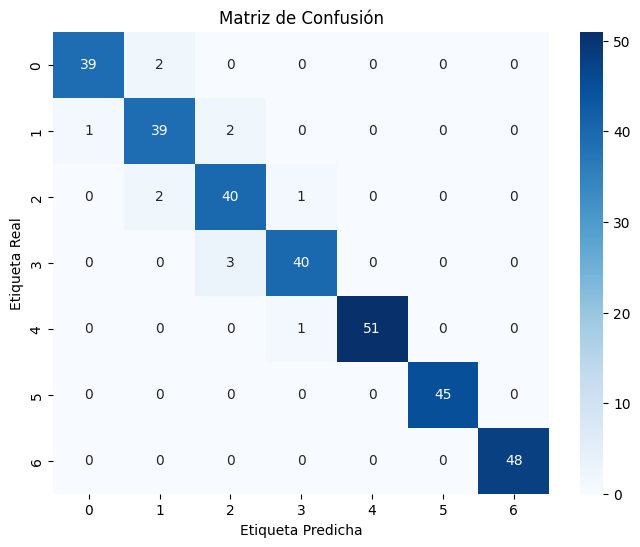

In [ ]:
# Calcular la matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusi√≥n con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusi√≥n")
plt.show()

La matriz de confusi√≥n obtenida muestra que el modelo SVM ha tenido un buen desempe√±o en la clasificaci√≥n de las clases de obesidad, aunque algunos errores a√∫n son evidentes. La mayor√≠a de las clases tienen un alto n√∫mero de aciertos en la diagonal (casos correctamente clasificados), especialmente en la clase 4 (con 51 muestras correctamente clasificadas) y en las clases 6 y 5, donde todos los elementos han sido clasificados correctamente. Sin embargo, hay algunos errores de clasificaci√≥n, como la clase 2 que tiene 5 falsos positivos. Estos errores podr√≠an deberse a una similitud en las caracter√≠sticas de las clases, lo que sugiere que el modelo podr√≠a mejorar con m√°s datos o una mayor optimizaci√≥n de los hiperpar√°metros.

En general, el modelo ha mostrado una capacidad s√≥lida para clasificar correctamente la mayor√≠a de los casos, con una ligera tendencia a confundir ciertas clases. El balance entre las clases tambi√©n parece ser adecuado, ya que la distribuci√≥n de muestras por clase es bastante homog√©nea, lo que ayuda al modelo a aprender de manera eficiente.

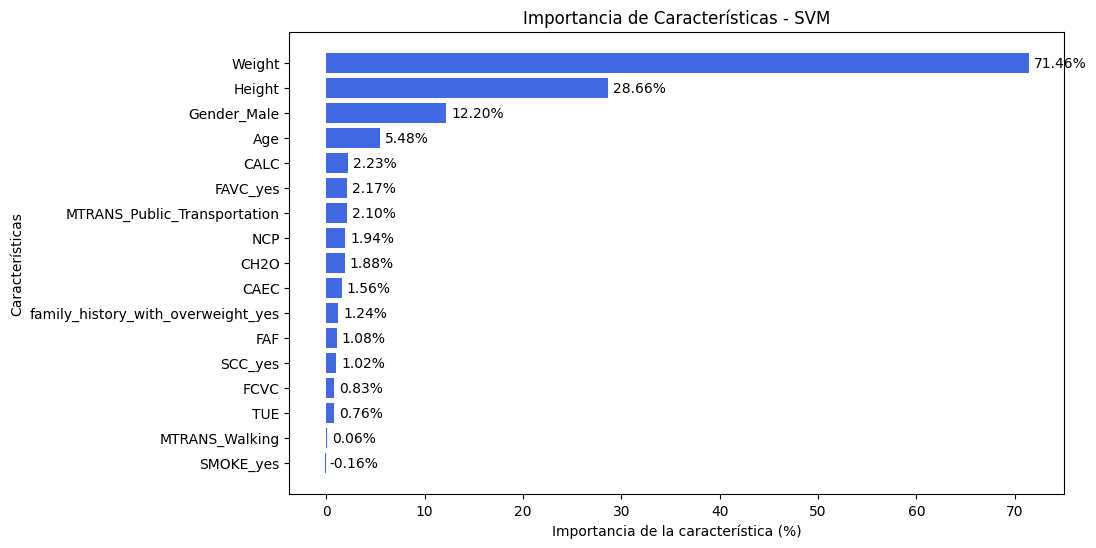

In [ ]:
# Evaluar la importancia de las caracter√≠sticas en el conjunto de prueba
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Obtener la importancia de las caracter√≠sticas
importance = result.importances_mean

# Ordenar las caracter√≠sticas por importancia
indices = np.argsort(importance)[::-1]
features = X_test.columns[indices]
importance_sorted = importance[indices] * 100  # Convertir a porcentaje

# Graficar la importancia de las caracter√≠sticas con valores en las barras
plt.figure(figsize=(10, 6))
bars = plt.barh(features, importance_sorted, color='royalblue')

# Agregar los valores en las barras
for bar, value in zip(bars, importance_sorted):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{value:.2f}%', va='center')

plt.xlabel('Importancia de la caracter√≠stica (%)')
plt.ylabel('Caracter√≠sticas')
plt.title('Importancia de Caracter√≠sticas - SVM')
plt.gca().invert_yaxis()
plt.show()

Observamos que la variable Weight (Peso) tiene una importancia muy alta (0.7086) pero como predecimos la obesidad es esperado, ya que es una de las variables m√°s directamente relacionadas con el resultado. Sin embargo, eso no significa necesariamente que haya sobreajuste.

Para estudiar si hay sobreajuste podemos comparar la exactitud en el conjunto de entrenamiento y en el test, as√≠ como graficar la curva de aprendizaje.

In [ ]:
# Calcular la precisi√≥n en el conjunto de entrenamiento + validaci√≥n y el de prueba
train_val_pred = best_svm.predict(np.vstack([X_train_scaled, X_val_scaled]))
test_pred = best_svm.predict(X_test_scaled)

# Precisi√≥n
train_val_acc = precision_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_acc = precision_score(y_test, test_pred, average='weighted')

# Calcular el recall en el conjunto de entrenamiento + validaci√≥n y el de prueba
train_val_recall = recall_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

# F1 score
train_val_f1 = f1_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_f1 = f1_score(y_test, test_pred, average='weighted')

# Imprimir los resultados
print(f"Train + Validation Accuracy: {train_val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Train + Validation Recall: {train_val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train + Validation F1 Score: {train_val_f1:.4f}")

Train + Validation Accuracy: 0.9972
Test Accuracy: 0.9626
Train + Validation Recall: 0.9972
Test Recall: 0.9618
Train + Validation F1 Score: 0.9972


Los resultados obtenidos muestran un rendimiento excelente del modelo SVM en t√©rminos de precisi√≥n, recall y F1 score tanto en el conjunto de entrenamiento + validaci√≥n como en el conjunto de prueba, con un 99.7% en el primero y un 96% en el segundo. Esto indica que el modelo ha aprendido de manera efectiva a clasificar las muestras, manteniendo un buen balance entre la detecci√≥n de las clases correctas y la minimizaci√≥n de los falsos positivos y negativos. La ligera diferencia entre los resultados de entrenamiento y prueba sugiere que el modelo est√° generalizando bien, sin sobreajustarse a los datos de entrenamiento, lo que es un buen indicador de su capacidad de generalizaci√≥n a datos no vistos.

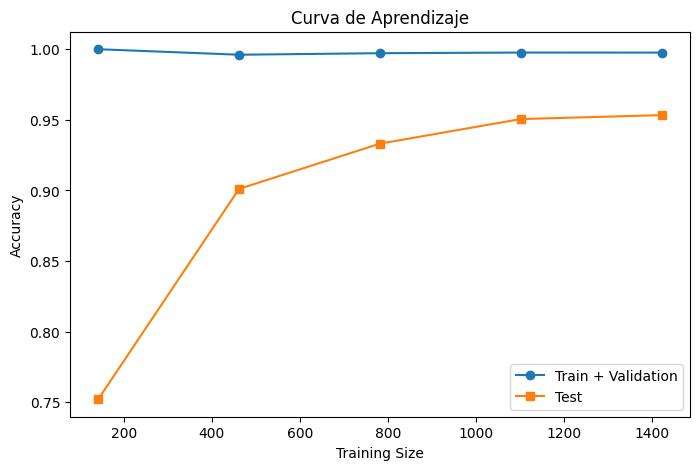

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]), cv=5, scoring='accuracy', n_jobs=-1)

# Calcular promedios
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Train + Validation", marker='o')
plt.plot(train_sizes, test_mean, label="Test", marker='s')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Curva de Aprendizaje")
plt.show()

En la gr√°fica de aprendizaje, se confirma lo que indican las m√©tricas: el modelo muestra un rendimiento consistente tanto en el conjunto de train + validation como en el de test. La estabilidad en ambas curvas sugiere que el modelo no est√° sobreajustando, lo que respalda la alta precisi√≥n, recall y F1 score obtenidos previamente. Esto refuerza la idea de que el modelo generaliza bien y no est√° aprendiendo de forma excesiva los detalles espec√≠ficos del conjunto de entrenamiento, sino que est√° aplicando correctamente lo aprendido a nuevos datos.

#-  SVM NO LINEAL sin la variable weight

Hacemos el modelo sin la variable Weight ya que su alta correlaci√≥n (0.8) con la variable objetivo 'NObeyesdad' podr√≠a llevar a un sobreajuste. Esto implicar√≠a que el modelo aprende patrones espec√≠ficos de los datos de entrenamiento pero falla al generalizar a nuevos datos. Al eliminarla, se busca que el modelo aprenda patrones m√°s generales y menos dependientes de una sola caracter√≠stica, lo que mejora la capacidad de generalizaci√≥n y evita que el modelo est√© excesivamente ajustado a las particularidades del conjunto de entrenamiento.


In [ ]:
# Separar caracter√≠sticas (X) y variable objetivo (y), sin la columna 'weight'
X = df.drop(columns=['NObeyesdad', 'Weight'])  # Eliminar 'weight' de las caracter√≠sticas
y = df['NObeyesdad']  # Variable objetivo

In [ ]:
# Dividir en entrenamiento (70%), validaci√≥n (15%) y prueba (15%)

# Dividimos en entrenamiento (70%) y otro 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # conjunto de entrenamiento
#con stratify=y nos aseguramos que las clases tengan una distribuci√≥n similar en cada conjunto

#Dividimos el segundo conjunto(30%) en un 15% para validaci√≥n y un 15% para test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) # conjuntos de validaci√≥n y prueba

# Escalar solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Crear y entrenar el modelo SVM con kernel RBF
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
# Utilizamos los par√°metros:
# C = 1.0
# gamma = 1 / (n_features * var(X)), donde var(X) es la varianza de los datos de entrada)

train_accuracies = []
val_accuracies = []

# Entrenar el modelo con diferentes tama√±os de datos para visualizar la curva de aprendizaje
for frac in np.linspace(0.1, 1.0, 10):
    X_train_frac = X_train_scaled[:int(frac * len(X_train_scaled))]
    y_train_frac = y_train[:int(frac * len(y_train))]

    # Entrenamiento inicial con el conjunto de entrenamiento
    svm_model.fit(X_train_frac, y_train_frac)

    # Evaluar en entrenamiento y validaci√≥n
    train_acc = accuracy_score(y_train_frac, svm_model.predict(X_train_frac))
    val_acc = accuracy_score(y_val, svm_model.predict(X_val_scaled))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Evaluar el modelo final:

# Entrenar con el conjunto completo de entrenamiento y validaci√≥n
X_train_val = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

svm_model.fit(X_train_val, y_train_val)

# Evaluaci√≥n final en el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)
print("Clasificaci√≥n del Test Set:\n", classification_report(y_test, y_pred))

Clasificaci√≥n del Test Set:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.67      0.57      0.62        42
           2       0.68      0.70      0.69        43
           3       0.79      0.70      0.74        43
           4       0.81      0.83      0.82        52
           5       0.85      0.91      0.88        45
           6       0.98      1.00      0.99        48

    accuracy                           0.80       314
   macro avg       0.79      0.79      0.79       314
weighted avg       0.80      0.80      0.80       314



In [ ]:
# Evaluaci√≥n en el conjunto de entrenamiento + validaci√≥n
train_val_acc = svm_model.score(X_train_val, y_train_val)

# Evaluaci√≥n en el conjunto de prueba
test_acc = svm_model.score(X_test_scaled, y_test)

# Imprimir los resultados
print(f"Train + Validation Accuracy: {train_val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Generar las predicciones para el conjunto de entrenamiento + validaci√≥n
y_train_val_pred = svm_model.predict(X_train_val)

# Generar las predicciones para el conjunto de prueba
y_test_pred = svm_model.predict(X_test_scaled)

# Calcular el F1 score en el conjunto de entrenamiento + validaci√≥n
f1_train_val = f1_score(y_train_val, y_train_val_pred, average='weighted')  # 'weighted' es √∫til si las clases est√°n desbalanceadas

# Calcular el F1 score en el conjunto de prueba
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados del F1 score
print(f"Train + Validation F1 Score: {f1_train_val:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

Train + Validation Accuracy: 0.8499
Test Accuracy: 0.7994
Train + Validation F1 Score: 0.8477
Test F1 Score: 0.7965


Observamos que la exactitud del modelo obtenido tras eliminar la variable 'Weight' disminuye a un 84.99%. Esto tiene sentido ya que al eliminar dicha variable es m√°s dif√≠cil clasificar seg√∫n la obesidad. Adem√°s, observamos que no hay sobreajuste ya que la exactitud sobre el conjunto de test (79.94%) es poco menor que la exactitud sobre el conjunto entrenamiento total (84.99%)

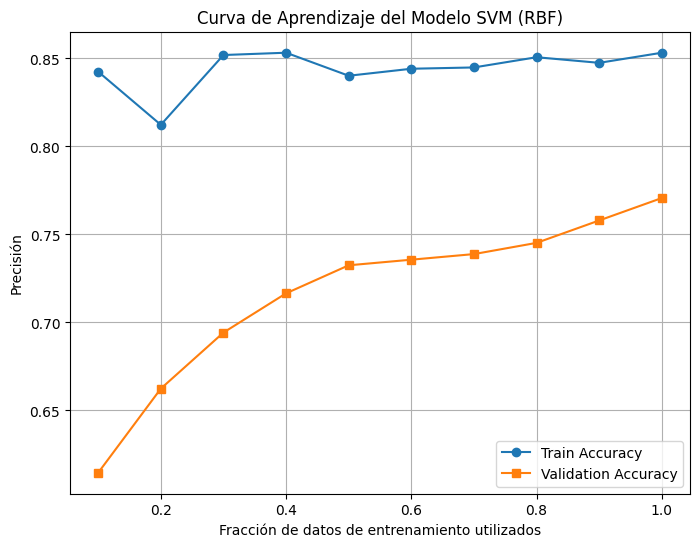

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear el vector de fracciones de datos de entrenamiento utilizados
frac_values = np.linspace(0.1, 1.0, 10)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(frac_values, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(frac_values, val_accuracies, label="Validation Accuracy", marker='s')

# Configurar etiquetas y t√≠tulo
plt.xlabel("Fracci√≥n de datos de entrenamiento utilizados")
plt.ylabel("Precisi√≥n")
plt.title("Curva de Aprendizaje del Modelo SVM (RBF)")
plt.legend()
plt.grid(True)

# Mostrar la gr√°fica
plt.show()


Observamos de nuevo en las curvas de aprendizaje lo que reflejan las m√©tricas, que el modelo  muestra un rendimiento consistente tanto en el conjunto de train + validation como en el de test. Adem√°s, no hay una gran distancia entre ambas curvas, lo que refuerza la idea de que el modelo generaliza bien y no est√° aprendiendo de forma excesiva los detalles espec√≠ficos del conjunto de entrenamiento.

Hacemos ahora uso del GridSearchCV para hacer el SVM no lineal con los mejores par√°metros del SVM:

Mejores hiperpar√°metros: {'C': 10, 'gamma': 0.1}


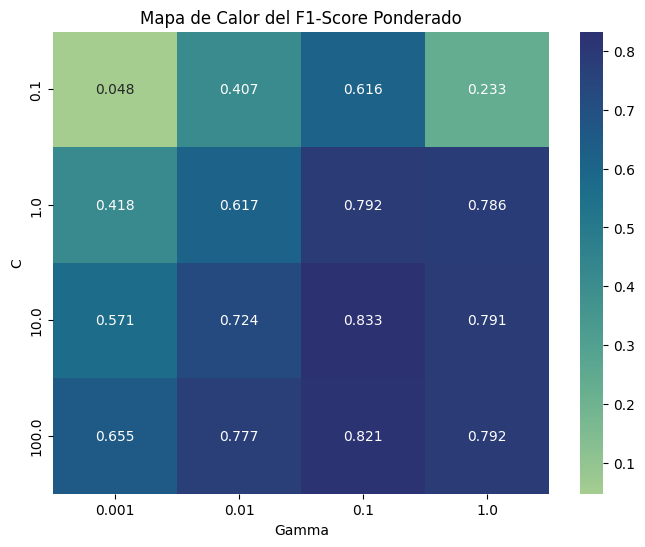

Cross-validation F1 Score (promedio): 0.8360
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.57      0.64      0.61        42
           2       0.74      0.67      0.71        43
           3       0.90      0.84      0.87        43
           4       0.87      0.90      0.89        52
           5       0.95      0.91      0.93        45
           6       0.98      1.00      0.99        48

    accuracy                           0.84       314
   macro avg       0.84      0.84      0.84       314
weighted avg       0.84      0.84      0.84       314



In [ ]:
# Definir el modelo SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Definir los valores de hiperpar√°metros a probar
param_grid = {
    'C': [0.1, 1, 10, 100],  # Valores peque√±os -> modelo simple, grandes -> modelo m√°s complejo
    'gamma': [0.001, 0.01, 0.1, 1]  # Valores peque√±os -> m√°s general, grandes -> m√°s sensible
}

# Validaci√≥n cruzada con GridSearch en el conjunto de entrenamiento (sin incluir validaci√≥n a√∫n)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperpar√°metros encontrados
best_params = grid_search.best_params_
print("Mejores hiperpar√°metros:", best_params)

# Representar la evoluci√≥n de la puntuaci√≥n F1 en funci√≥n de los hiperpar√°metros
scores = grid_search.cv_results_['mean_test_score']
C_values = np.array(param_grid['C'])
gamma_values = np.array(param_grid['gamma'])
scores_matrix = scores.reshape(len(C_values), len(gamma_values))

plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap="crest", fmt=".3f")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Mapa de Calor del F1-Score Ponderado")
plt.show()

# Entrenar el mejor modelo con el conjunto de entrenamiento y validaci√≥n
best_svm = SVC(kernel='rbf', probability=True, random_state=42, **best_params)

# Realizar validaci√≥n cruzada para evaluar si el modelo est√° sobreajustando
cross_val_scores = cross_val_score(best_svm, np.vstack([X_train_scaled, X_val_scaled]),
                                   np.hstack([y_train, y_val]), cv=5, scoring='f1_weighted', n_jobs=-1)

print(f"Cross-validation F1 Score (promedio): {cross_val_scores.mean():.4f}")



best_svm.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

# Evaluaci√≥n final en el conjunto de prueba
y_test_pred = best_svm.predict(X_test_scaled)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Al comparar los resultados del modelo SVM sin la variable weight con los obtenidos con ella, observamos una disminuci√≥n en el rendimiento. Lo que indica que weight tiene un impacto positivo en la clasificaci√≥n de los niveles de obesidad. Aunque el modelo sigue siendo competitivo, con una precisi√≥n de 0.84 en el conjunto de test, muestra una menor capacidad para clasificar correctamente las clases intermedias (especialmente las clases 1 y 2), lo que sugiere que weight ayudaba a mejorar la discriminaci√≥n en esos casos.

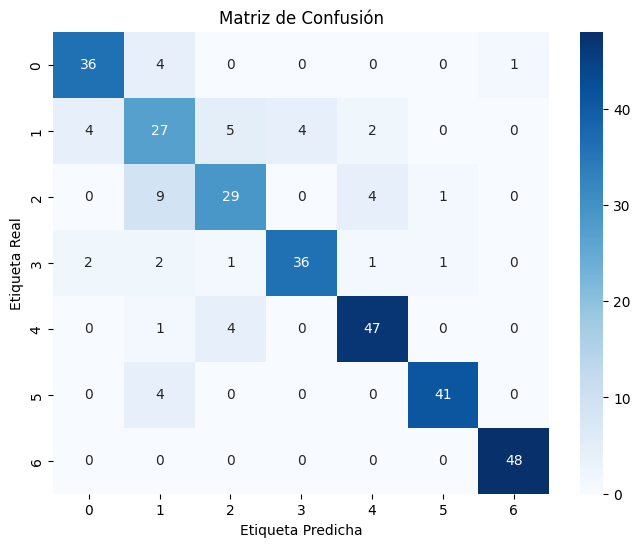

In [ ]:
# Calcular la matriz de confusi√≥n en el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusi√≥n con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusi√≥n")
plt.show()

La matriz de confusi√≥n muestra que el modelo sin la variable weight tiene dificultades para clasificar algunas clases de manera precisa. Por ejemplo, la clase 1 (obesidad moderada) presenta varias confusiones, con 4 muestras clasificadas como clase 0 (bajo peso) y 5 como clase 2 (sobrepeso), lo que indica que el modelo tiene dificultades para distinguir entre ciertos niveles de obesidad. Sin embargo, el desempe√±o en la clase 6 (obesidad extrema) sigue siendo casi perfecto, con 48 de 49 muestras correctamente clasificadas. La presencia de errores en clases intermedias sugiere que la variable weight podr√≠a haber sido importante para mejorar la precisi√≥n en esas clases.

Variable Age: 0.2054
Variable Height: 0.1768
Variable FCVC: 0.1401
Variable NCP: 0.1073
Variable CAEC: 0.0659
Variable CH2O: 0.0707
Variable FAF: 0.0672
Variable TUE: 0.0471
Variable CALC: 0.1987
Variable Gender_Male: 0.2102
Variable family_history_with_overweight_yes: 0.1417
Variable FAVC_yes: 0.0726
Variable SCC_yes: 0.0363
Variable SMOKE_yes: 0.0061
Variable MTRANS_Public_Transportation: 0.1420
Variable MTRANS_Walking: 0.0127


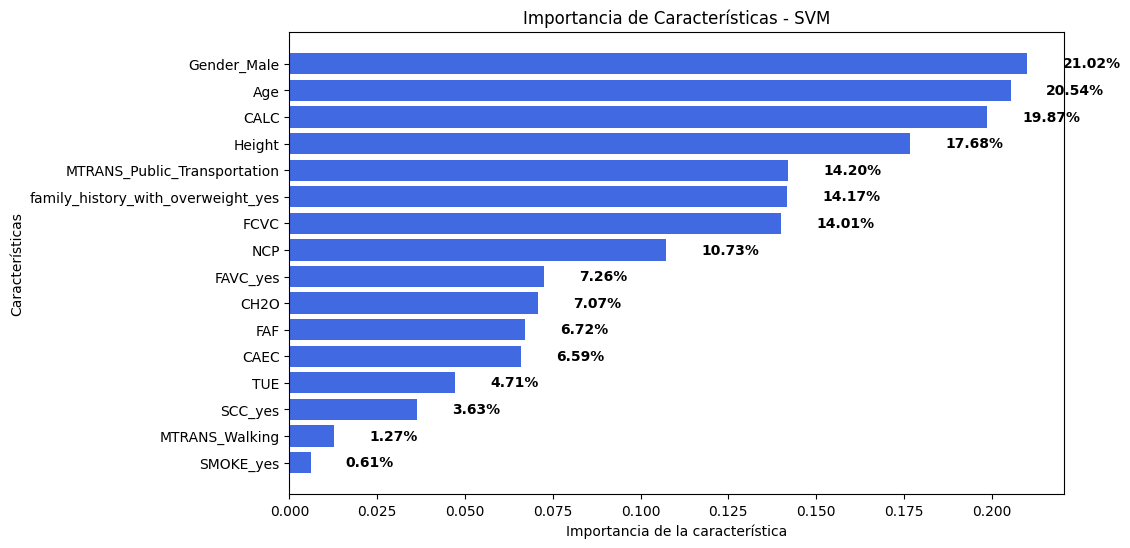

In [ ]:
# Evaluar la importancia de las caracter√≠sticas en el conjunto de prueba
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Imprimir la importancia de las caracter√≠sticas con los nombres de las variables
importance = result.importances_mean
for i, v in enumerate(importance):
    print(f"Variable {X_test.columns[i]}: {v:.4f}")

# Graficar la importancia de las caracter√≠sticas
indices = np.argsort(importance)[::-1]
features = X_test.columns[indices]
importance_sorted = importance[indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(features, importance_sorted, color='royalblue')
plt.xlabel('Importancia de la caracter√≠stica')
plt.ylabel('Caracter√≠sticas')
plt.title('Importancia de Caracter√≠sticas - SVM')
plt.gca().invert_yaxis()

# A√±adir el porcentaje en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width*100:.2f}%',
             va='center', ha='left', color='black', fontweight='bold')

plt.show()

Al comparar los modelos SVM con y sin la variable peso, observamos una diferencia notable en la importancia de las caracter√≠sticas. Con la variable peso, esta tiene un impacto abrumadoramente alto (0.7086), lo que resalta su relevancia para la clasificaci√≥n de los niveles de obesidad. Adem√°s, variables como Height y Gender_Male tambi√©n muestran un peso significativo. Sin embargo, al quitar la variable peso del modelo, el impacto relativo de otras variables, como Age, Gender_Male, y CALC, aumentan en importancia, lo que sugiere que estos factores juegan un papel m√°s destacado en la clasificaci√≥n sin la presencia de la variable de peso. Esto indica que, aunque el modelo con peso es m√°s preciso, la eliminaci√≥n de esta variable permite una mayor evaluaci√≥n de otros factores de riesgo asociados con la obesidad, aunque con una ligera disminuci√≥n en el rendimiento del modelo

In [ ]:
# Calcular la precisi√≥n en el conjunto de entrenamiento + validaci√≥n y el de prueba
train_val_pred = best_svm.predict(np.vstack([X_train_scaled, X_val_scaled]))
test_pred = best_svm.predict(X_test_scaled)

# Precisi√≥n
train_val_acc = precision_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_acc = precision_score(y_test, test_pred, average='weighted')

# Calcular el recall en el conjunto de entrenamiento + validaci√≥n y el de prueba
train_val_recall = recall_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')

# F1 score
train_val_f1 = f1_score(np.hstack([y_train, y_val]), train_val_pred, average='weighted')
test_f1 = f1_score(y_test, test_pred, average='weighted')

# Imprimir los resultados
print(f"Train + Validation Accuracy: {train_val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Train + Validation Recall: {train_val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train + Validation F1 Score: {train_val_f1:.4f}")

Train + Validation Accuracy: 0.9804
Test Accuracy: 0.8444
Train + Validation Recall: 0.9803
Test Recall: 0.8408
Train + Validation F1 Score: 0.9803


Los resultados del modelo SVM sin la variable peso muestran una alta precisi√≥n, recall y F1-score en el conjunto de entrenamiento y validaci√≥n (alrededor de 0.98), lo que indica que el modelo es capaz de clasificar correctamente la mayor√≠a de los casos durante el entrenamiento. Sin embargo, al evaluarlo en el conjunto de prueba, se observa una disminuci√≥n en las m√©tricas de rendimiento, con una precisi√≥n y un recall de alrededor de 0.84. Esto sugiere que, aunque el modelo tiene un buen desempe√±o en los datos de entrenamiento, pierde algo de capacidad para generalizar a nuevos datos, lo que podr√≠a estar relacionado con la eliminaci√≥n de la variable peso, que era un factor importante en la clasificaci√≥n de los niveles de obesidad.

La principal causa de la disminuci√≥n en las m√©tricas de prueba parece ser la eliminaci√≥n de la variable peso, que ten√≠a una alta importancia en la clasificaci√≥n. Al prescindir de esta caracter√≠stica clave, el modelo pierde capacidad para distinguir correctamente algunas clases, especialmente las intermedias, aunque sigue teniendo una buena capacidad para clasificar.

#-  PERCEPTR√ìN MULTICAPA (PMC)

Ahora, vamos a trabajar con el Perceptr√≥n Multicapa (PMC), que es un buen clasificador no lineal. El PMC tiene la capacidad de aprender representaciones no lineales gracias a su estructura de red neuronal, lo que lo convierte en una opci√≥n poderosa para tareas de clasificaci√≥n. Primero, haremos uso de los valores por defecto del modelo de la librer√≠a Scikit-Learn.

El modelo MLPClassifier por defecto usa los siguientes valores:

* hidden_layer_sizes=(100,): Una sola capa oculta con 100 neuronas.
* activation='relu': Funci√≥n de activaci√≥n ReLU (Rectified Linear Unit).
* solver='adam': Algoritmo de optimizaci√≥n Adam, muy eficiente para redes neuronales.
* max_iter=200: N√∫mero m√°ximo de iteraciones (√©pocas).
* random_state=None: No se especifica una semilla para la aleatoriedad (puede cambiar en cada ejecuci√≥n).

In [ ]:
# Dividir en conjuntos de entrenamiento, validaci√≥n y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Escalar los datos (normalizaci√≥n)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo Perceptr√≥n Multicapa con los par√°metros por defecto
mlp_model = MLPClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
mlp_model.fit(X_train_scaled, y_train)

# Evaluaci√≥n en el conjunto de validaci√≥n
y_val_pred = mlp_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en Validaci√≥n: {accuracy:.4f}")

# Si el desempe√±o es bueno, entrenamos con todo el set de entrenamiento + validaci√≥n
mlp_model.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

# Evaluaci√≥n final en el conjunto de prueba
y_test_pred = mlp_model.predict(X_test_scaled)
print("Classification Report en Test Set:\n", classification_report(y_test, y_test_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy en Validaci√≥n: 0.7834
Classification Report en Test Set:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        41
           1       0.68      0.40      0.51        42
           2       0.66      0.63      0.64        43
           3       0.74      0.81      0.78        43
           4       0.72      0.83      0.77        52
           5       0.91      0.93      0.92        45
           6       0.98      1.00      0.99        48

    accuracy                           0.79       314
   macro avg       0.78      0.78      0.77       314
weighted avg       0.78      0.79      0.78       314



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Evaluaci√≥n en el conjunto de entrenamiento + validaci√≥n
y_train_val_pred = mlp_model.predict(np.vstack([X_train_scaled, X_val_scaled]))
y_train_val_true = np.hstack([y_train, y_val])

# Calcular precisi√≥n, recall y F1 para el conjunto de entrenamiento + validaci√≥n
precision_train_val = precision_score(y_train_val_true, y_train_val_pred, average='weighted')
recall_train_val = recall_score(y_train_val_true, y_train_val_pred, average='weighted')
f1_train_val = f1_score(y_train_val_true, y_train_val_pred, average='weighted')

print(f"Metricas en Entrenamiento + Validaci√≥n:")
print(f"Precisi√≥n: {precision_train_val:.4f}")
print(f"Recall: {recall_train_val:.4f}")
print(f"F1-score: {f1_train_val:.4f}")

# Evaluaci√≥n final en el conjunto de prueba
y_test_pred = mlp_model.predict(X_test_scaled)

# Calcular precisi√≥n, recall y F1 para el conjunto de prueba
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nMetricas en Test Set:")
print(f"Precisi√≥n: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

Metricas en Entrenamiento + Validaci√≥n:
Precisi√≥n: 0.9178
Recall: 0.9185
F1-score: 0.9180

Metricas en Test Set:
Precisi√≥n: 0.7817
Recall: 0.7866
F1-score: 0.7782


Para mejorar su rendimiento, realizaremos una b√∫squeda de los mejores par√°metros utilizando `GridSearchCV`, que nos permitir√° explorar diferentes combinaciones de hiperpar√°metros, como el tama√±o de las capas ocultas, las funciones de activaci√≥n y los algoritmos de optimizaci√≥n. Encontrando as√≠ la configuraci√≥n m√°s adecuada con el objetivo de obtener los mejores resultados en nuestro conjunto de datos.

In [ ]:
# Dividir en conjuntos de entrenamiento, validaci√≥n y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Escalar los datos (normalizaci√≥n)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Definir modelo base
mlp_model = MLPClassifier(random_state=42)

# Definir los valores de hiperpar√°metros a probar (ajustados para evitar sobreajuste)
param_grid = {
    'hidden_layer_sizes': [(32,32), (64,32), (128,64)],
    'activation': ['relu'],  # ReLU suele ser mejor en redes profundas
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001],  # Regularizaci√≥n m√°s suave
    'max_iter': [300, 500],
    'early_stopping': [True],
    'n_iter_no_change': [10]
}


# Realizar validaci√≥n cruzada con GridSearch
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperpar√°metros encontrados
best_params = grid_search.best_params_
print("Mejores hiperpar√°metros:", best_params)

# Entrenar el modelo con los mejores hiperpar√°metros y early stopping
best_mlp = MLPClassifier(
    random_state=42,
    **best_params
)

# Entrenar con el conjunto de entrenamiento
best_mlp.fit(X_train_scaled, y_train)

# Evaluaci√≥n en el conjunto de validaci√≥n
y_val_pred = best_mlp.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en Validaci√≥n: {accuracy:.4f}")

# Si el desempe√±o es bueno, entrenamos con todo el set de entrenamiento + validaci√≥n
best_mlp.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

# Evaluaci√≥n final en el conjunto de prueba
y_test_pred = best_mlp.predict(X_test_scaled)
print("Classification Report en Test Set:\n", classification_report(y_test, y_test_pred))

Mejores hiperpar√°metros: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant', 'max_iter': 300, 'n_iter_no_change': 10, 'solver': 'adam'}
Accuracy en Validaci√≥n: 0.7834
Classification Report en Test Set:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.69      0.43      0.53        42
           2       0.53      0.60      0.57        43
           3       0.57      0.72      0.64        43
           4       0.81      0.65      0.72        52
           5       0.88      0.93      0.90        45
           6       0.94      1.00      0.97        48

    accuracy                           0.73       314
   macro avg       0.73      0.72      0.72       314
weighted avg       0.74      0.73      0.73       314



Los hiperpar√°metros seleccionados para el Perceptr√≥n Multicapa (PMC) reflejan una configuraci√≥n balanceada y eficiente. La funci√≥n de activaci√≥n ReLU fue elegida por su capacidad para acelerar la convergencia y manejar el problema del desvanecimiento del gradiente en redes profundas. La arquitectura del modelo incluye dos capas ocultas con 128 y 64 neuronas, lo que proporciona suficiente capacidad para capturar patrones complejos sin incurrir en sobreajuste.

El modelo utiliza un learning rate constante, lo que permite un ajuste estable de los pesos durante el entrenamiento, mientras que el optimizador Adam equilibra la velocidad y la precisi√≥n en la actualizaci√≥n de los par√°metros. Adem√°s, se emple√≥ early stopping con un criterio de 10 iteraciones sin mejora, lo que previene un entrenamiento innecesario y ayuda a evitar el sobreajuste.

Con un m√°ximo de 300 iteraciones, el modelo logr√≥ un accuracy en validaci√≥n del 78.34%, mientras que en el conjunto de prueba alcanz√≥ un 73% de precisi√≥n general. En general, estos hiperpar√°metros ofrecen una base s√≥lida para entrenar un PMC, con posibilidades de refinamiento adicional seg√∫n el comportamiento del modelo en datos reales.

In [ ]:
# Predecir para el conjunto de entrenamiento + validaci√≥n
y_train_val_pred = best_mlp.predict(np.vstack([X_train_scaled, X_val_scaled]))

# Predecir para el conjunto de prueba
y_test_pred = best_mlp.predict(X_test_scaled)

# Calcular precisi√≥n, recall y F1 score para el conjunto de entrenamiento + validaci√≥n
train_val_precision = precision_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_recall = recall_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_f1 = f1_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')

# Calcular precisi√≥n, recall y F1 score para el conjunto de prueba
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados
print(f"Train + Validation Precision: {train_val_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train + Validation Recall: {train_val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train + Validation F1 Score: {train_val_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Train + Validation Precision: 0.7670
Test Precision: 0.7362
Train + Validation Recall: 0.7650
Test Recall: 0.7293
Train + Validation F1 Score: 0.7637
Test F1 Score: 0.7254


No hay indicios de sobreajuste en el modelo, ya que las m√©tricas de entrenamiento (Train + Validation) y prueba (Test) son bastante cercanas:

* Precisi√≥n (Precision): 76.70% (Train + Validation) vs. 73.62% (Test) ‚Üí Diferencia de solo 3.08%
* Recall: 76.50% (Train + Validation) vs. 72.93% (Test) ‚Üí Diferencia de 3.57%
* F1 Score: 76.37% (Train + Validation) vs. 72.54% (Test) ‚Üí Diferencia de 3.83%

Si hubiera sobreajuste, esperar√≠amos que las m√©tricas de entrenamiento fueran significativamente m√°s altas que las de prueba. En este caso, las diferencias son peque√±as, lo que indica que el modelo generaliza bien a datos no vistos y no se ha ajustado excesivamente a los datos de entrenamiento.

Por lo tanto, podemos concluir que no hay sobreajuste y que el modelo mantiene un equilibrio adecuado entre entrenamiento y generalizaci√≥n.

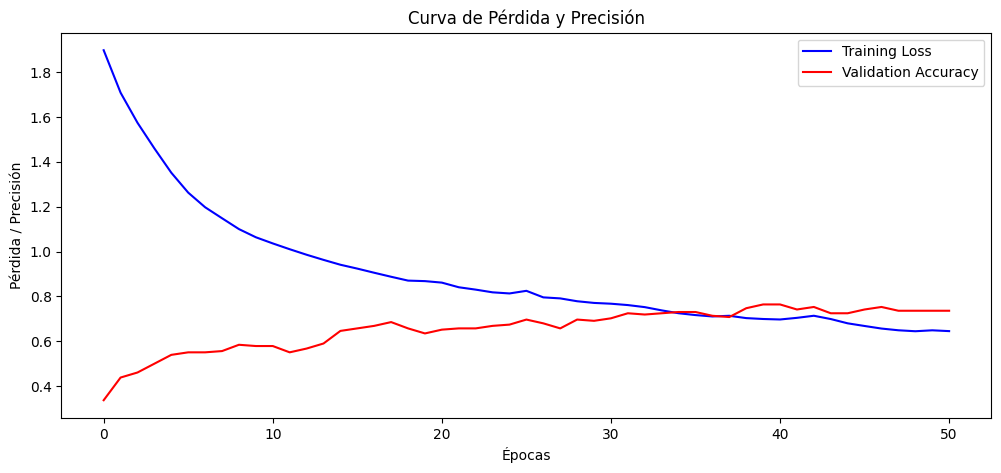

In [ ]:
# Graficar la curva de p√©rdida
plt.figure(figsize=(12,5))
plt.plot(best_mlp.loss_curve_, label="Training Loss", color='blue')

# Si early stopping se activ√≥, graficamos la validaci√≥n
if hasattr(best_mlp, 'validation_scores_') and best_mlp.validation_scores_ is not None and len(best_mlp.validation_scores_) > 0:
    plt.plot(best_mlp.validation_scores_, label="Validation Accuracy", color='red')
else:
    print("Early stopping did not trigger or validation scores are not available.")

plt.xlabel("√âpocas")
plt.ylabel("P√©rdida / Precisi√≥n")
plt.title("Curva de P√©rdida y Precisi√≥n")
plt.legend()
plt.show()

La gr√°fica indica que el modelo ha aprendido de manera efectiva sin se√±ales evidentes de sobreajuste, ya que la p√©rdida de entrenamiento disminuye progresivamente y la precisi√≥n de validaci√≥n se estabiliza sin ca√≠das bruscas. A partir de aproximadamente 40 √©pocas, ambos valores dejan de mejorar significativamente, lo que sugiere que entrenar por m√°s tiempo no aportar√≠a beneficios adicionales. Para optimizar a√∫n m√°s el rendimiento, se podr√≠a ajustar la tasa de aprendizaje o aplicar regularizaci√≥n (por ejemplo: dropout), pero en general, el modelo muestra una buena capacidad de generalizaci√≥n.

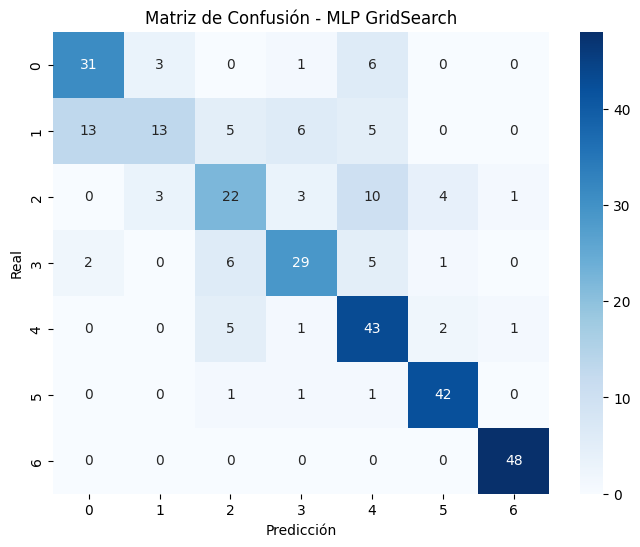

In [ ]:
# Generar la matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusi√≥n - MLP GridSearch')
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.show()

In [ ]:
# Contar el n√∫mero de elementos por clase en y_test (pandas)
clases_count = y_test.value_counts()
print("N√∫mero de elementos por clase en el conjunto de prueba:")
print(clases_count)


N√∫mero de elementos por clase en el conjunto de prueba:
NObeyesdad
4    52
6    48
5    45
2    43
3    43
1    42
0    41
Name: count, dtype: int64


La matriz de confusi√≥n muestra un buen desempe√±o del modelo en la clasificaci√≥n de patrones, con clases como la 6, 5 y 4 correctamente identificadas en la mayor√≠a de los casos. Sin embargo, hay confusiones significativas en clases como la 1 y 2, donde los errores de clasificaci√≥n se distribuyen entre varias categor√≠as, lo que indica que los patrones en estas clases pueden ser m√°s similares o solapados. Mejoras en la selecci√≥n de caracter√≠sticas o t√©cnicas como aumento de datos y ajuste de hiperpar√°metros podr√≠an ayudar a diferenciar mejor estas clases y optimizar el rendimiento del modelo.

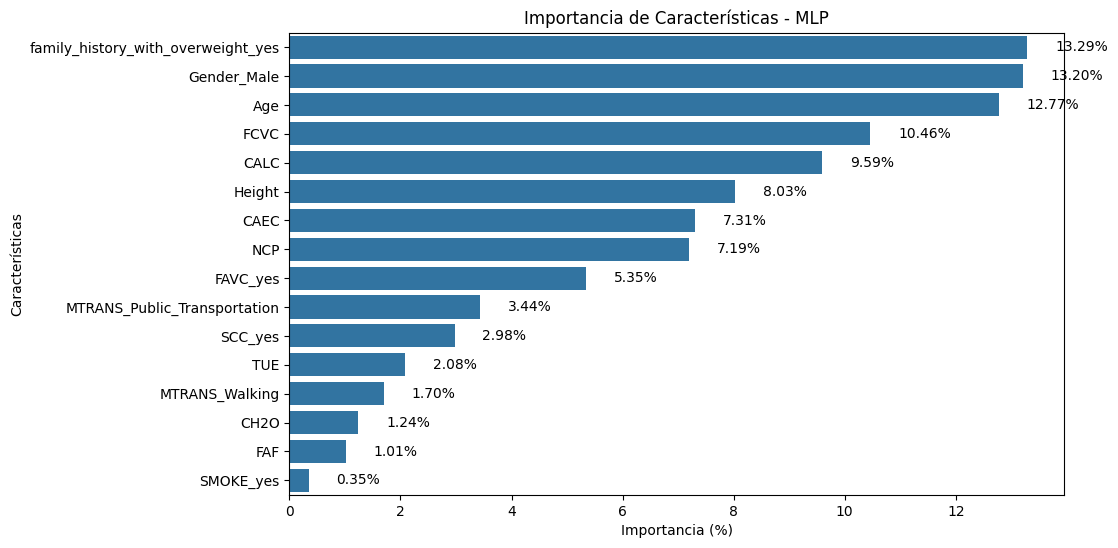

In [ ]:
# Evaluamos la importancia de las caracter√≠sticas
result = permutation_importance(best_mlp, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1) # Cambio: Usamos best_mlp directamente
importance = result.importances_mean
importance_percentage = (importance / np.sum(importance)) * 100  # Convertimos a porcentaje

# Ordenamos las caracter√≠sticas por importancia
i_sorted = np.argsort(importance_percentage)[::-1]
nombres_features = X.columns[i_sorted]
importancia_ordenada = importance_percentage[i_sorted]

# Graficamos
plt.figure(figsize=(10, 6))
sns.barplot(x=importancia_ordenada, y=nombres_features)
for i, v in enumerate(importancia_ordenada):
    plt.text(v + 0.5, i, f"{v:.2f}%", va='center', fontsize=10)
plt.xlabel("Importancia (%)")
plt.ylabel("Caracter√≠sticas")
plt.title("Importancia de Caracter√≠sticas - MLP")
plt.show()


Hacemos uso de cross-validation que es un m√©todo de regularizaci√≥n para evitar el sobreajuste.

In [ ]:
# Definir el modelo MLP
mlp = MLPClassifier(random_state=42, max_iter=300)  # Reducimos iteraciones para acelerar entrenamiento

# Definir los valores de hiperpar√°metros a probar
param_grid = {
    'hidden_layer_sizes': [(32,32), (64,32),(128,64), (256, 128)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001],  # Tasa de aprendizaje m√°s baja
    'alpha': [0.0001, 0.001],  # Regularizaci√≥n L2
    'max_iter': [300],
    'early_stopping': [True],
    'n_iter_no_change': [10]
}


# Combinamos los conjuntos de entrenamiento y validaci√≥n
X_train_val_scaled = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Realizar validaci√≥n cruzada con GridSearch en el conjunto combinado
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_val_scaled, y_train_val)

# Obtener los mejores hiperpar√°metros encontrados
best_params = grid_search.best_params_
print("Mejores hiperpar√°metros:", best_params)

# Realizar validaci√≥n cruzada (k-fold) con el mejor modelo encontrado
# Despu√©s de realizar la b√∫squeda, cross_val_score entrena el modelo en el conjunto de entrenamiento + validaci√≥n utilizando validaci√≥n cruzada, devolviendo la precisi√≥n (accuracy).
# Cuando se hace la validaci√≥n cruzada, ya est√°s entrenando el modelo, pero en diferentes particiones del conjunto de datos de entrenamiento y validaci√≥n
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_val_scaled, y_train_val, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")

# Evaluaci√≥n final en el conjunto de prueba
y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Mejores hiperpar√°metros: {'activation': 'relu', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (256, 128), 'learning_rate_init': 0.001, 'max_iter': 300, 'n_iter_no_change': 10, 'solver': 'adam'}
Cross-Validation Accuracy: 0.8049 ¬± 0.0086
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.68      0.31      0.43        42
           2       0.56      0.51      0.54        43
           3       0.71      0.67      0.69        43
           4       0.61      0.83      0.70        52
           5       0.86      0.93      0.89        45
           6       0.96      1.00      0.98        48

    accuracy                           0.73       314
   macro avg       0.72      0.72      0.71       314
weighted avg       0.72      0.73      0.71       314



In [ ]:
# Predecir para el conjunto de entrenamiento + validaci√≥n
y_train_val_pred = grid_search.best_estimator_.predict(np.vstack([X_train_scaled, X_val_scaled]))

# Realizar predicciones
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calcular precisi√≥n, recall y F1 score para el conjunto de entrenamiento + validaci√≥n
train_val_precision = precision_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_recall = recall_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_f1 = f1_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')

# Calcular precisi√≥n, recall y F1 score para el conjunto de prueba
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados
print(f"Train + Validation Precision: {train_val_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train + Validation Recall: {train_val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train + Validation F1 Score: {train_val_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Train + Validation Precision: 0.7835
Test Precision: 0.7249
Train + Validation Recall: 0.7712
Test Recall: 0.7261
Train + Validation F1 Score: 0.7666
Test F1 Score: 0.7127


Los resultados de cross-validation muestran que, a pesar del ajuste de hiperpar√°metros, el rendimiento en el conjunto de prueba es ligeramente inferior al de train + validation, con diferencias notables en precisi√≥n (5.87%) y F1-score (5.39%). Esto sugiere que el modelo puede estar capturando patrones espec√≠ficos del conjunto de entrenamiento pero no generaliza tan bien a datos no vistos.

Esta disminuci√≥n en el desempe√±o podr√≠a deberse a la varianza en los datos de prueba, una mayor complejidad del modelo que lo hace m√°s sensible a los datos de entrenamiento, o incluso a un posible desequilibrio en las clases que afecta la generalizaci√≥n. Aunque se aplic√≥ un ajuste con GridSearchCV, los resultados indican que el modelo a√∫n enfrenta dificultades en ciertas clases, por lo que podr√≠an explorarse otras t√©cnicas como ingenier√≠a de caracter√≠sticas, regularizaci√≥n o recolecci√≥n de m√°s datos representativos.

#- KNN con par√°metros fijados:

El KNN es un algoritmo de aprendizaje supervisado utilizado tanto para clasificaci√≥n como para regresi√≥n. En este caso lo aplicamos para un problema de clasificaci√≥n.

Algoritmo:
- Seleccionar K: Elegir el n√∫mero de vecinos m√°s cercanos a considerar.
- Calcular la distancia: Determinar la distancia entre el punto nuevo y todos los puntos en el conjunto de datos.
- Encontrar K vecinos m√°s cercanos: Ordenar las distancias y seleccionar los K m√°s cercanos.
- La clase se asigna por mayor√≠a de votos de los vecinos.


Distancia:
- Distancia Euclidiana: Utilizada cuando las caracter√≠sticas son continuas y est√°n en la misma escala.
- Distancia Manhattan: M√°s robusta a las diferencias en escala.
- Distancia de Minkowski: Generaliza las anteriores.

Importancia de K:
- K peque√±o: Modelo m√°s flexible, pero puede sobreajustar (overfitting).
- K grande: Modelo m√°s robusto, pero puede subajustar (underfitting).

M√©todo de selecci√≥n:
- Validaci√≥n cruzada (cross-validation).
- Elecci√≥n del K con mejor desempe√±o en m√©tricas como accuracy o F1-score.


In [ ]:
# Separar caracter√≠sticas (X) y variable objetivo (y)
X = df.drop(columns=['NObeyesdad', 'Weight'])  # Eliminar 'Weight' de las caracter√≠sticas
y = df['NObeyesdad']  # Variable objetivo

# Dividir en entrenamiento (70%), validaci√≥n (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
# Escalar SOLO con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

- n_neighbors=5: El modelo clasificar√° un punto bas√°ndose en las 5 muestras m√°s cercanas a √©l. Un valor peque√±o de k puede llevar a un modelo m√°s sensible al ruido, mientras que un valor grande puede hacer que el modelo sea m√°s general y menos sensible a patrones espec√≠ficos.
- metric='minkowski': El modelo usar√° la distancia Minkowski para calcular la proximidad entre los puntos, y con p=2 (por defecto), esta es equivalente a la distancia Euclidiana. .

In [ ]:
# Definir el modelo KNN b√°sico (sin b√∫squeda de hiperpar√°metros)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluaci√≥n en el conjunto de validaci√≥n
y_val_pred = knn_model.predict(X_val_scaled)
print("Classification Report on Validation Set:\n", classification_report(y_val, y_val_pred))

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.70      0.98      0.82        41
           1       0.58      0.27      0.37        41
           2       0.77      0.77      0.77        43
           3       0.87      0.75      0.80        44
           4       0.77      0.85      0.81        52
           5       0.79      0.93      0.85        44
           6       0.98      0.96      0.97        49

    accuracy                           0.79       314
   macro avg       0.78      0.79      0.77       314
weighted avg       0.79      0.79      0.78       314



In [ ]:
# Entrenar el modelo con el conjunto de entrenamiento completo (train + validation)
knn_model.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

KNeighborsClassifier()

In [ ]:
# Accuracy en el conjunto de entrenamiento + validaci√≥n
train_val_accuracy = knn_model.score(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val])) * 100
print(f"Train + Validation Accuracy: {train_val_accuracy:.2f}%")

# Accuracy en el conjunto de prueba
test_accuracy = knn_model.score(X_test_scaled, y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train + Validation Accuracy: 84.60%
Test Accuracy: 78.98%


El modelo tiene un buen desempe√±o en el conjunto de entrenamiento y validaci√≥n No parece estar sobreajustado excesivamente, ya que la precisi√≥n no es demasiado alta en comparaci√≥n con el test.

Hay una ligera ca√≠da en el rendimiento en el conjunto de prueba. Esto sugiere que el modelo generaliza de manera decente, pero a√∫n podr√≠a mejorarse para reducir la diferencia.

In [ ]:
# Evaluaci√≥n final en el conjunto de prueba
y_test_pred = knn_model.predict(X_test_scaled)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

# Calcular precisi√≥n, recall y F1 score para el conjunto de prueba
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.67      0.43      0.52        42
           2       0.68      0.65      0.67        43
           3       0.68      0.74      0.71        43
           4       0.85      0.85      0.85        52
           5       0.86      0.98      0.92        45
           6       0.98      1.00      0.99        48

    accuracy                           0.79       314
   macro avg       0.78      0.78      0.77       314
weighted avg       0.78      0.79      0.78       314

Test Precision: 0.7839
Test Recall: 0.7898
Test F1 Score: 0.7821


Resultados obtenidos:

- La clase 6 tiene una precisi√≥n y recall cercanos al 100%, lo que indica que el modelo la distingue con mucha claridad. La clase 5 tambi√©n muestra un fuerte rendimiento (F1-score = 0.92), con alta precisi√≥n y recall. La clase 4 mantiene un F1-score s√≥lido (0.85) con buen balance entre precisi√≥n y recall.
- La clase 1 tiene el peor desempe√±o (F1-score = 0.52) debido a un bajo recall (0.43), lo que sugiere que muchos ejemplos de esta clase est√°n siendo clasificados incorrectamente en otras categor√≠as. La clase 2 tambi√©n tiene un rendimiento moderado (F1-score = 0.67), aunque no tan cr√≠tico como la clase 1.

- Macro avg (~0.78 en precisi√≥n, recall y F1-score): Indica un rendimiento equilibrado entre clases, sin que el modelo favorezca en exceso una categor√≠a sobre otra.
- Weighted avg (~0.78): Como las clases tienen tama√±os diferentes, esta m√©trica ponderada confirma que el rendimiento general es bastante estable.

- Test Precision (0.7839), Recall (0.7898) y F1-score (0.7821): La precisi√≥n y el recall est√°n bien balanceados, lo que significa que el modelo no comete demasiados falsos positivos ni falsos negativos en general. El F1-score promedio de 0.78 sugiere que el modelo logra un buen equilibrio entre la detecci√≥n correcta y la reducci√≥n de errores.

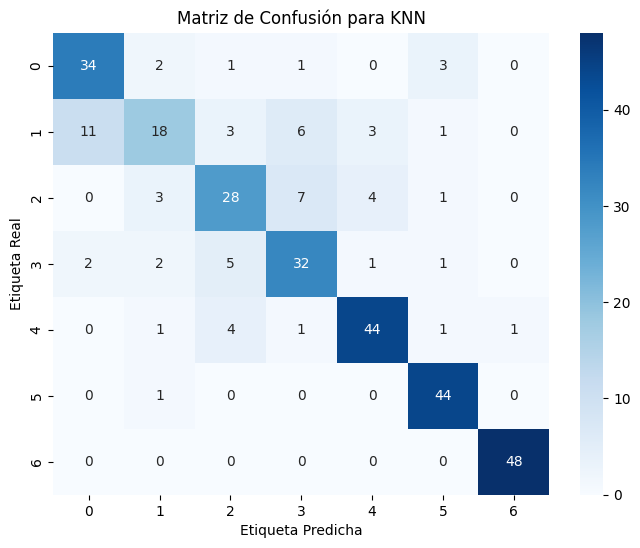

In [ ]:
# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusi√≥n para KNN")
plt.show()

El modelo KNN tiene un desempe√±o razonable, ya que la mayor√≠a de las predicciones correctas est√°n en la diagonal principal. Sin embargo, hay algunos errores de clasificaci√≥n en clases cercanas, lo que sugiere que el modelo podr√≠a beneficiarse de un mejor ajuste de hiperpar√°metros o t√©cnicas adicionales como la selecci√≥n de caracter√≠sticas o normalizaci√≥n.

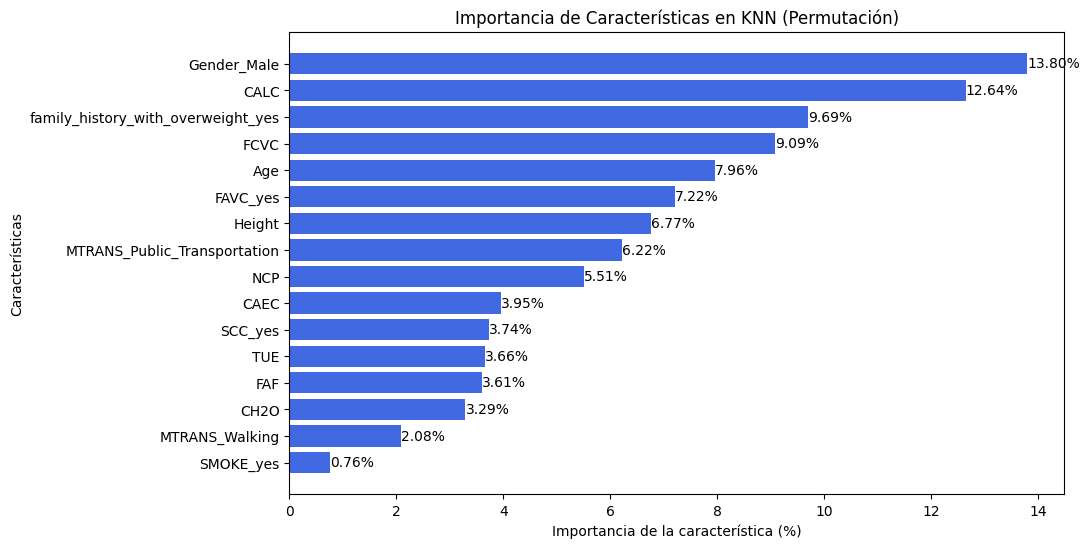

In [ ]:
# Importancia de variables usando permutaci√≥n
perm_importance = permutation_importance(knn_model, X_test_scaled, y_test, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean

# Normalizar importancias para que sumen 100
feature_importances = (feature_importances / feature_importances.sum()) * 100

# Obtener nombres de las variables
feature_names = X.columns

# Ordenar las caracter√≠sticas por importancia descendente
indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[indices]
sorted_importance = feature_importances[indices]

# Graficar la importancia de las variables en horizontal con valores num√©ricos
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importance, color='royalblue')
plt.xlabel("Importancia de la caracter√≠stica (%)")
plt.ylabel("Caracter√≠sticas")
plt.title("Importancia de Caracter√≠sticas en KNN (Permutaci√≥n)")
plt.gca().invert_yaxis()

# Agregar etiquetas num√©ricas a las barras
for bar, importance in zip(bars, sorted_importance):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}%', va='center')

plt.show()

- Gender_Male (13.80%) y CALC (12.64%) son las variables que m√°s influyen en el modelo. Historial familiar de sobrepeso (9.69%) y Frecuencia de consumo de vegetales (FCVC - 9.09%) tambi√©n tienen un impacto significativo. Esto sugiere que g√©nero, consumo de alcohol, antecedentes familiares y dieta son factores clave en la clasificaci√≥n.

- Edad (7.96%), FAVC (7.22%) y altura (6.77%) tienen una contribuci√≥n notable. Uso del transporte p√∫blico (6.22%) y n√∫mero de comidas al d√≠a (5.51%) tambi√©n son relevantes.

- Tabaquismo (SMOKE_yes - 0.76%) tiene la menor importancia, lo que sugiere que no influye mucho en la clasificaci√≥n. Caminar como medio de transporte (MTRANS_Walking - 2.08%) y consumo de agua (CH2O - 3.29%) tambi√©n tienen baja relevancia.

El modelo KNN se basa fuertemente en factores de estilo de vida (alcohol, dieta), antecedentes familiares y g√©nero para realizar predicciones. Algunas variables esperadas, como fumar o la hidrataci√≥n, tienen poca influencia, lo que podr√≠a indicar que su relaci√≥n con la variable objetivo no es fuerte en este dataset.

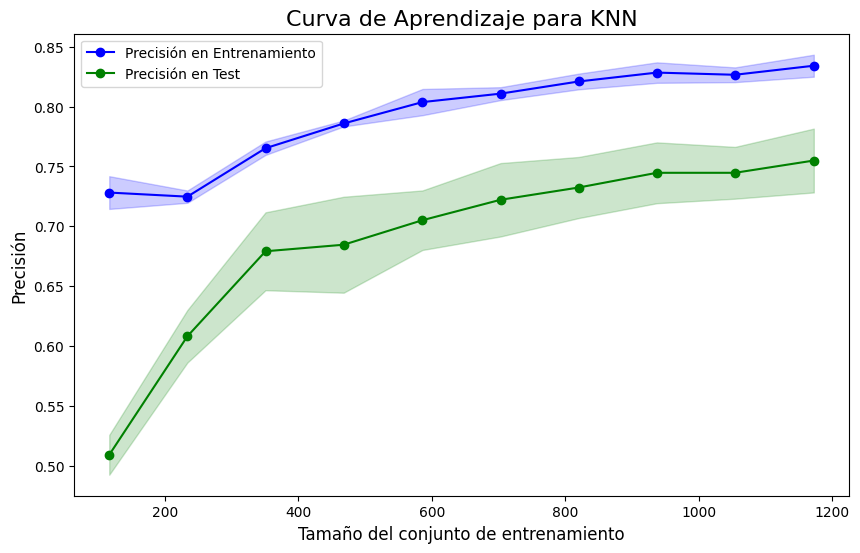

In [ ]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proporci√≥n de los datos de entrenamiento
    cv=5,                                   # Validaci√≥n cruzada con 5 particiones
    n_jobs=-1                                # Usar todos los n√∫cleos disponibles
)

# Calcular el promedio y la desviaci√≥n est√°ndar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Precisi√≥n en Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Precisi√≥n en Test', color='green', marker='o')

# Rellenar con color las √°reas alrededor de las l√≠neas
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# Etiquetas y t√≠tulo
plt.title("Curva de Aprendizaje para KNN", fontsize=16)
plt.xlabel("Tama√±o del conjunto de entrenamiento", fontsize=12)
plt.ylabel("Precisi√≥n", fontsize=12)
plt.legend()

# Mostrar la gr√°fica
plt.show()

Tendencia de la Precisi√≥n en Entrenamiento: Comienza alta con pocos datos y disminuye levemente conforme se agregan m√°s muestras. Se estabiliza alrededor de 0.83 - 0.85, lo que indica que el modelo aprende y se ajusta bien.

Tendencia de la Precisi√≥n en Test: Empieza baja (~0.50) con pocos datos y mejora r√°pidamente conforme aumenta el tama√±o del conjunto de entrenamiento.
Se estabiliza alrededor de 0.75, aunque todav√≠a existe una brecha con la curva de entrenamiento.

Brecha entre Entrenamiento y Test: Existe una diferencia notable entre ambas curvas, especialmente cuando hay m√°s datos. Esto sugiere que el modelo puede estar sufriendo de overfitting (sobreajuste), ya que la precisi√≥n en entrenamiento es significativamente mayor que en prueba.

Las partes sombreadas alrededor de las curvas representan la variabilidad o incertidumbre de la m√©trica de precisi√≥n. Generalmente, estas sombras indican el intervalo de confianza o la desviaci√≥n est√°ndar de la precisi√≥n en cada punto del conjunto de entrenamiento:
- Si la sombra es estrecha: significa que los resultados son m√°s consistentes y estables.
- Si la sombra es ancha: indica mayor variabilidad, es decir, que la precisi√≥n cambia significativamente dependiendo de la partici√≥n del conjunto de datos.

#- KNN modificando par√°metros:

In [ ]:
# Separar caracter√≠sticas (X) y variable objetivo (y), sin la columna 'weight'
X = df.drop(columns=['NObeyesdad', 'Weight'])  # Eliminar 'Weight' de las caracter√≠sticas
y = df['NObeyesdad']  # Variable objetivo

# Dividir en entrenamiento (70%), validaci√≥n (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  # Conjunto de entrenamiento
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)  # Conjuntos de validaci√≥n y prueba

# Escalar SOLO con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

- n_neighbors (N√∫mero de vecinos): Este hiperpar√°metro define el n√∫mero de vecinos m√°s cercanos que se considerar√°n para predecir la clase de una muestra nueva.
- metric (M√©trica de distancia): Este par√°metro define qu√© distancia se utilizar√° para calcular la cercan√≠a entre los puntos de datos. KNN se basa en calcular la distancia entre puntos y luego elegir los m√°s cercanos. .
- weights (Pesos de los vecinos): Este hiperpar√°metro define c√≥mo se ponderan las contribuciones de los vecinos a la predicci√≥n de la clase. uniform: Todos los vecinos tienen el mismo peso, es decir, contribuyen de igual manera a la predicci√≥n.

In [ ]:
# Definir el modelo KNN
knn_model = KNeighborsClassifier()

# Definir los valores de hiperpar√°metros a probar
param_grid = {
    'n_neighbors': [5, 7, 9, 11, 15],  # N√∫mero de vecinos a considerar
    'metric': ['minkowski'],  # Diferentes m√©tricas de distancia
    'weights': ['uniform'],  # Diferentes estrategias para pesar los vecinos
}

# Validaci√≥n cruzada con GridSearch en el conjunto de entrenamiento
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperpar√°metros encontrados
best_params = grid_search.best_params_
print("Mejores hiperpar√°metros:", best_params)

Mejores hiperpar√°metros: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}


El mejor modelo seleccionado corresponde al modelo preestablecido, ya explicado anteriormente.

In [ ]:
# Entrenar el mejor modelo con el conjunto de entrenamiento completo (train + validation)
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

KNeighborsClassifier()

In [ ]:
# Predicci√≥n en el conjunto de prueba
y_test_pred = best_knn.predict(X_test_scaled)

# Predicci√≥n en el conjunto de entrenamiento + validaci√≥n
y_train_val_pred = best_knn.predict(np.vstack([X_train_scaled, X_val_scaled]))

# Calcular la precisi√≥n en el conjunto de entrenamiento + validaci√≥n
train_val_accuracy = accuracy_score(np.hstack([y_train, y_val]), y_train_val_pred)

# Calcular la precisi√≥n en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)

# Reporte de clasificaci√≥n
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))

# Mostrar accuracies
print(f"Train + Validation Accuracy: {train_val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.67      0.43      0.52        42
           2       0.68      0.65      0.67        43
           3       0.68      0.74      0.71        43
           4       0.85      0.85      0.85        52
           5       0.86      0.98      0.92        45
           6       0.98      1.00      0.99        48

    accuracy                           0.79       314
   macro avg       0.78      0.78      0.77       314
weighted avg       0.78      0.79      0.78       314

Train + Validation Accuracy: 84.60%
Test Accuracy: 78.98%


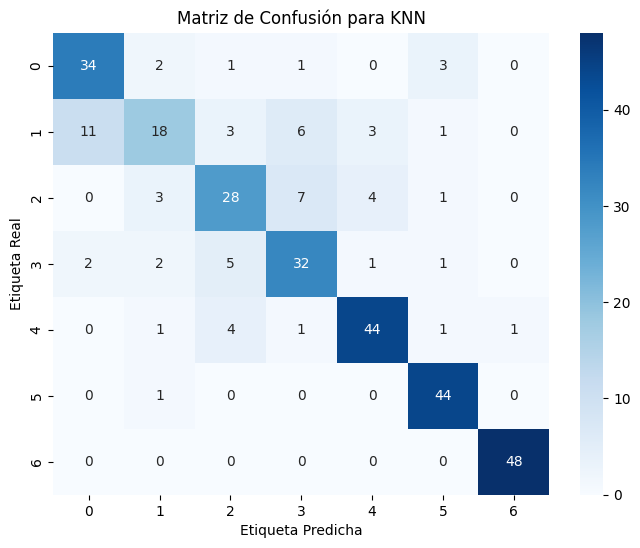

In [ ]:
# Matriz de Confusi√≥n
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusi√≥n para KNN")
plt.show()

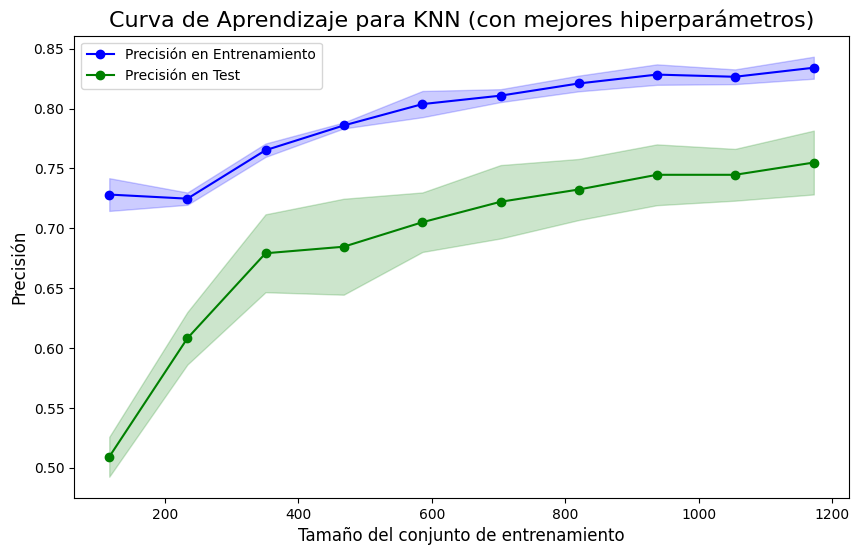

In [ ]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_knn, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proporci√≥n de los datos de entrenamiento
    cv=5,                                   # Validaci√≥n cruzada con 5 particiones
    n_jobs=-1                                # Usar todos los n√∫cleos disponibles
)

# Calcular el promedio y la desviaci√≥n est√°ndar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Precisi√≥n en Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Precisi√≥n en Test', color='green', marker='o')

# Rellenar con color las √°reas alrededor de las l√≠neas
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# Etiquetas y t√≠tulo
plt.title("Curva de Aprendizaje para KNN (con mejores hiperpar√°metros)", fontsize=16)
plt.xlabel("Tama√±o del conjunto de entrenamiento", fontsize=12)
plt.ylabel("Precisi√≥n", fontsize=12)
plt.legend()

# Mostrar la gr√°fica
plt.show()

#- Random Forest con par√°metros preseleccionados:

Los √°rboles de decisi√≥n son clasificadores no lineales que dividen el espacio de caracter√≠sticas en regiones mediante reglas basadas en las variables m√°s relevantes. Sin embargo, un solo √°rbol puede ser sensible a peque√±as variaciones en los datos, lo que lleva a sobreajuste. Para mejorar su estabilidad y precisi√≥n, se introduce Random Forest, un m√©todo de ensamble que combina m√∫ltiples √°rboles de decisi√≥n entrenados con diferentes subconjuntos de datos y caracter√≠sticas.

Random Forest mejora la generalizaci√≥n al reducir la varianza del modelo mediante el promedio de predicciones de varios √°rboles independientes. Utiliza muestreo aleatorio (bootstrap) para crear conjuntos de entrenamiento variados y selecciona un subconjunto aleatorio de caracter√≠sticas en cada divisi√≥n del √°rbol, lo que evita que un solo predictor domine el aprendizaje. Este enfoque lo hace robusto, preciso y menos propenso al sobreajuste en comparaci√≥n con un solo √°rbol de decisi√≥n.

In [ ]:
# Separar caracter√≠sticas (X) y variable objetivo (y), sin la columna 'Weight'
X = df.drop(columns=['NObeyesdad', 'Weight'])  # Eliminar 'Weight' de las caracter√≠sticas
y = df['NObeyesdad']  # Variable objetivo

# Dividir en entrenamiento (70%), validaci√≥n (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
# Escalar SOLO con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

- n_estimators=200 (N√∫mero de √°rboles en el bosque): Este par√°metro define cu√°ntos √°rboles (clasificadores) compondr√°n el bosque aleatorio. Al aumentar el n√∫mero de √°rboles, el modelo se vuelve m√°s robusto y suele reducir la varianza y el riesgo de sobreajuste. Sin embargo, tambi√©n puede aumentar el tiempo de c√≥mputo.
- max_depth=10 (Profundidad m√°xima de los √°rboles): Define la m√°xima profundidad de cada √°rbol. La profundidad es el n√∫mero de divisiones que un √°rbol puede hacer desde la ra√≠z hasta una hoja (el nodo final). Limitar la profundidad ayuda a evitar el sobreajuste (overfitting). Si los √°rboles son demasiado profundos, pueden aprender patrones muy espec√≠ficos del conjunto de entrenamiento (y no generalizar bien a nuevos datos).
- min_samples_split=2 (N√∫mero m√≠nimo de muestras para dividir un nodo): Este par√°metro especifica el n√∫mero m√≠nimo de muestras que un nodo debe tener para poder ser dividido en nodos hijos. Si un nodo tiene menos muestras que este valor, no se realizar√° una divisi√≥n adicional. Este par√°metro controla el crecimiento del √°rbol y la profundidad de la divisi√≥n. Si se usa un valor bajo como 2, los √°rboles pueden tener m√°s divisiones, lo que podr√≠a aumentar la varianza y el riesgo de sobreajuste.
- min_samples_leaf=1 (N√∫mero m√≠nimo de muestras en una hoja): Este par√°metro define el n√∫mero m√≠nimo de muestras que un nodo hoja (el nodo final de un √°rbol) debe contener. Si min_samples_leaf=1, cada hoja puede contener solo un ejemplo del conjunto de entrenamiento, lo que podr√≠a llevar a √°rboles muy espec√≠ficos (posiblemente sobreajustados). Usar un valor mayor asegura que las hojas no se vuelvan demasiado espec√≠ficas, promoviendo una mayor generalizaci√≥n. Esto puede ayudar a reducir el sobreajuste.
- max_features='auto' (N√∫mero m√°ximo de caracter√≠sticas a considerar para cada divisi√≥n): Este par√°metro especifica el n√∫mero m√°ximo de caracter√≠sticas que se considerar√°n en cada divisi√≥n de un √°rbol.
- random_state=42 (Semilla aleatoria para la reproducibilidad): Este par√°metro se usa para fijar la semilla del generador de n√∫meros aleatorios, lo que permite obtener los mismos resultados cada vez que se ejecute el c√≥digo.

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,             # Aumentar el n√∫mero de √°rboles para mayor robustez
    max_depth=10,                  # Reducir la profundidad de los √°rboles
    min_samples_split=2,         # Requerir al menos 10 muestras para dividir un nodo
    min_samples_leaf=1,           # Al menos 5 muestras por hoja
    max_features='sqrt',          # Considerar log2 caracter√≠sticas en cada divisi√≥n
    class_weight='balanced',      # Ajustar pesos por clases desbalanceadas
    random_state=42
)

rf_model.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [ ]:
# Definir el modelo Random Forest b√°sico (sin b√∫squeda de hiperpar√°metros)
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
# Evaluaci√≥n en el conjunto de validaci√≥n
y_val_pred = rf_model.predict(X_val_scaled)
print("Classification Report on Validation Set:\n", classification_report(y_val, y_val_pred))

Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        41
           1       0.65      0.78      0.71        41
           2       0.88      0.65      0.75        43
           3       0.88      0.80      0.83        44
           4       0.76      0.92      0.83        52
           5       0.95      0.95      0.95        44
           6       1.00      0.96      0.98        49

    accuracy                           0.86       314
   macro avg       0.87      0.85      0.85       314
weighted avg       0.87      0.86      0.86       314



In [ ]:
# Entrenar el modelo con el conjunto de entrenamiento completo (train + validation)
rf_model.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
# Accuracy en el conjunto de entrenamiento + validaci√≥n
train_val_accuracy = rf_model.score(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val])) * 100
print(f"Train + Validation Accuracy: {train_val_accuracy:.2f}%")

# Accuracy en el conjunto de prueba
test_accuracy = rf_model.score(X_test_scaled, y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Imprimir el classification report en el conjunto de prueba
print("\nClassification Report en Test Set:\n", classification_report(y_test, rf_model.predict(X_test_scaled)))


Train + Validation Accuracy: 98.54%
Test Accuracy: 83.76%

Classification Report en Test Set:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82        41
           1       0.68      0.62      0.65        42
           2       0.74      0.67      0.71        43
           3       0.77      0.84      0.80        43
           4       0.87      0.92      0.90        52
           5       0.90      0.96      0.92        45
           6       1.00      1.00      1.00        48

    accuracy                           0.84       314
   macro avg       0.83      0.83      0.83       314
weighted avg       0.83      0.84      0.84       314



In [ ]:
# Accuracy en el conjunto de entrenamiento + validaci√≥n
train_val_accuracy = rf_model.score(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val])) * 100
print(f"Train + Validation Accuracy: {train_val_accuracy:.2f}%")

# Accuracy en el conjunto de prueba
test_accuracy = rf_model.score(X_test_scaled, y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Train + Validation Accuracy: 98.54%
Test Accuracy: 83.76%


Los resultados del Random Forest con par√°metros por defecto muestran un posible sobreajuste, ya que la accuracy en Train + Validation (98.54%) es significativamente mayor que en el Test Set (83.76%). Esta brecha indica que el modelo ha aprendido muy bien los patrones en el entrenamiento, pero su capacidad de generalizaci√≥n a datos no vistos es m√°s limitada.

El sobreajuste es com√∫n en √°rboles de decisi√≥n y Random Forest con demasiadas profundidades, ya que estos modelos pueden memorizar los datos de entrenamiento en lugar de encontrar patrones generales. Para mitigar este problema, se podr√≠an ajustar hiperpar√°metros clave como n√∫mero de √°rboles (n_estimators), profundidad m√°xima (max_depth) o la cantidad m√≠nima de muestras por nodo (min_samples_split), adem√°s de explorar t√©cnicas como reducci√≥n de dimensiones o eliminaci√≥n de variables irrelevantes.

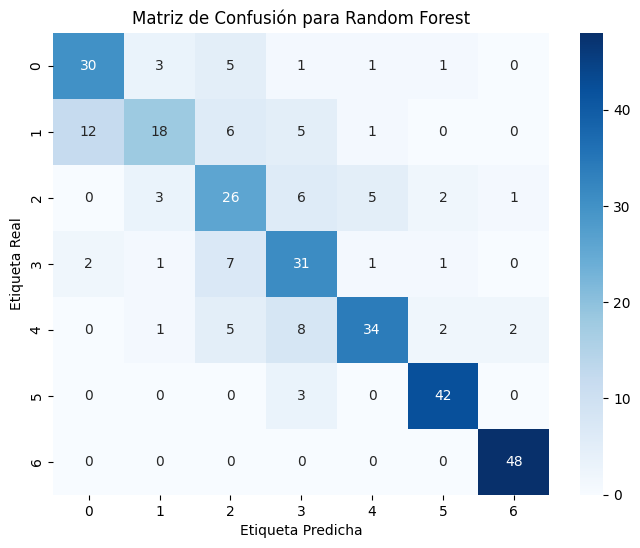

In [ ]:
# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusi√≥n para Random Forest")
plt.show()

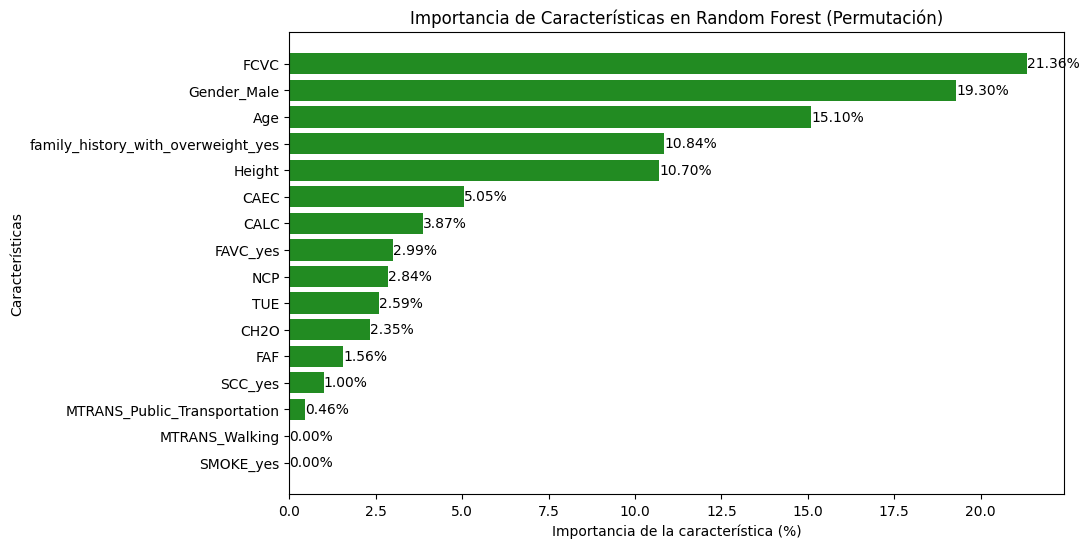

In [ ]:
# Importancia de variables usando permutaci√≥n
perm_importance = permutation_importance(rf_model, X_test_scaled, y_test, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean

# Normalizar importancias para que sumen 100
feature_importances = (feature_importances / feature_importances.sum()) * 100

# Obtener nombres de las variables
feature_names = X.columns

# Ordenar las caracter√≠sticas por importancia descendente
indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[indices]
sorted_importance = feature_importances[indices]

# Graficar la importancia de las variables en horizontal con valores num√©ricos
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importance, color='forestgreen')
plt.xlabel("Importancia de la caracter√≠stica (%)")
plt.ylabel("Caracter√≠sticas")
plt.title("Importancia de Caracter√≠sticas en Random Forest (Permutaci√≥n)")
plt.gca().invert_yaxis()

# Agregar etiquetas num√©ricas a las barras
for bar, importance in zip(bars, sorted_importance):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}%', va='center')

plt.show()

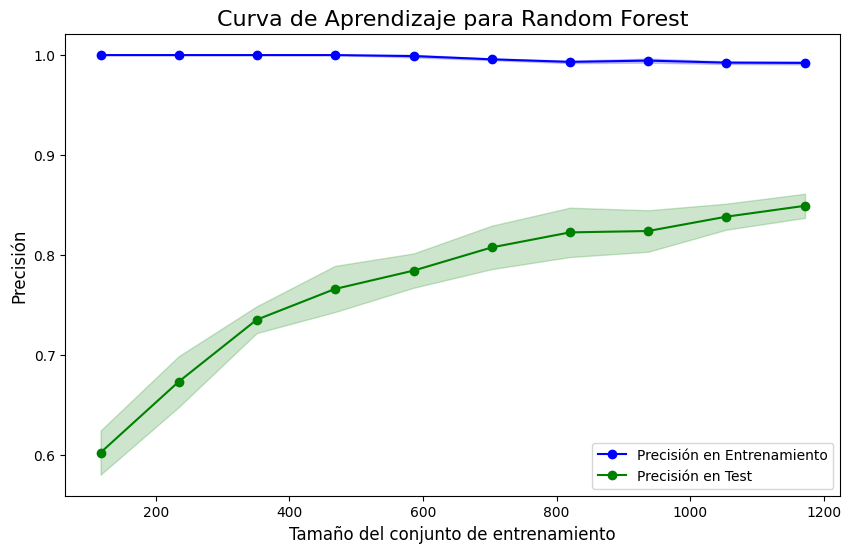

In [ ]:
# Obtener las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proporci√≥n de los datos de entrenamiento
    cv=5,                                   # Validaci√≥n cruzada con 5 particiones
    n_jobs=-1                                # Usar todos los n√∫cleos disponibles
)

# Calcular el promedio y la desviaci√≥n est√°ndar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Precisi√≥n en Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Precisi√≥n en Test', color='green', marker='o')

# Rellenar con color las √°reas alrededor de las l√≠neas
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# Etiquetas y t√≠tulo
plt.title("Curva de Aprendizaje para Random Forest", fontsize=16)
plt.xlabel("Tama√±o del conjunto de entrenamiento", fontsize=12)
plt.ylabel("Precisi√≥n", fontsize=12)
plt.legend()

# Mostrar la gr√°fica
plt.show()

Las preguntas que hace un √°rbol de decisi√≥n en un modelo de Random Forest no son aleatorias; est√°n basadas en las caracter√≠sticas de los datos y en c√≥mo mejor dividirlos para hacer una predicci√≥n m√°s precisa. El proceso es estructurado y se basa en medidas estad√≠sticas como la impureza de Gini o la entrop√≠a, que ayudan a determinar qu√© pregunta hacer en cada nodo.

Cada "nodo" del √°rbol representa una pregunta sobre una caracter√≠stica particular del conjunto de datos. Estas preguntas tienen como objetivo dividir el conjunto de datos en subgrupos m√°s peque√±os y homog√©neos. El proceso se repite en cada nodo, creando m√°s divisiones hasta que se alcanza un punto en el que no se puede dividir m√°s.

Aunque los √°rboles de Random Forest pueden parecer que generan decisiones aleatorias por el hecho de ser modelos basados en m√∫ltiples √°rboles independientes, las preguntas en cada uno de esos √°rboles son estrat√©gicas. Est√°n dise√±adas para organizar y separar los datos de la mejor manera posible, con el fin de hacer predicciones lo m√°s precisas posibles.

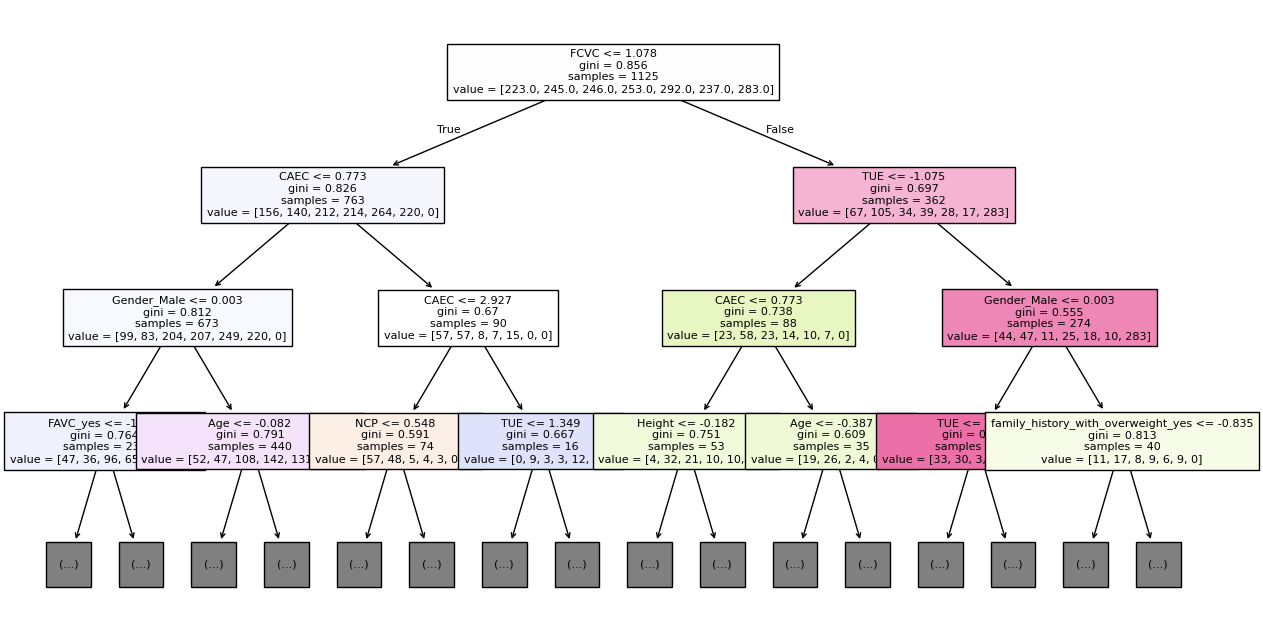

|--- FCVC <= 1.08
|   |--- CAEC <= 0.77
|   |   |--- Gender_Male <= 0.00
|   |   |   |--- FAVC_yes <= -1.20
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- FAVC_yes >  -1.20
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- Gender_Male >  0.00
|   |   |   |--- Age <= -0.08
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Age >  -0.08
|   |   |   |   |--- truncated branch of depth 7
|   |--- CAEC >  0.77
|   |   |--- CAEC <= 2.93
|   |   |   |--- NCP <= 0.55
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- NCP >  0.55
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- CAEC >  2.93
|   |   |   |--- TUE <= 1.35
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- TUE >  1.35
|   |   |   |   |--- truncated branch of depth 4
|--- FCVC >  1.08
|   |--- TUE <= -1.07
|   |   |--- CAEC <= 0.77
|   |   |   |--- Height <= -0.18
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Height >  -0.18
|

In [ ]:
# Acceder directamente a un √°rbol del bosque (por ejemplo, el primero)
arbol_ejemplo = rf_model.estimators_[0]

# Graficar el √°rbol
plt.figure(figsize=(15, 8))
plot_tree(arbol_ejemplo, feature_names=X.columns.tolist(), filled=True, fontsize=8, max_depth=3)
plt.show()

print(export_text(arbol_ejemplo, feature_names=X.columns.tolist(), max_depth=3))

# Random Forest cambiando parametros:

Ahora, para mejorar el rendimiento del modelo de Random Forest que utilizamos inicialmente, planeo probar un Random Forest con GridSearch. Este enfoque nos permitir√° optimizar los hiperpar√°metros del modelo, como el n√∫mero de √°rboles (n_estimators), la profundidad m√°xima de los √°rboles (max_depth), el n√∫mero m√≠nimo de muestras para dividir un nodo (min_samples_split) y el n√∫mero m√≠nimo de muestras en una hoja (min_samples_leaf), entre otros.

Al realizar una b√∫squeda en una cuadr√≠cula de hiperpar√°metros posibles, podemos encontrar la combinaci√≥n que maximice el rendimiento del modelo en t√©rminos de precisi√≥n, recall y otras m√©tricas importantes. Esto deber√≠a resultar en un modelo m√°s robusto y optimizado, mejorando a√∫n m√°s la capacidad de clasificaci√≥n de las personas seg√∫n su nivel de sobrepeso.

In [ ]:
# Separar caracter√≠sticas (X) y variable objetivo (y), sin la columna 'Weight'
X = df.drop(columns=['NObeyesdad', 'Weight'])
y = df['NObeyesdad']

# Dividir en entrenamiento (70%), validaci√≥n (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Escalar SOLO con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Usar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Definir los par√°metros para mejorar el sobreajuste
param_grid = {
    'n_estimators': [100, 150],  # Menos √°rboles para reducir sobreajuste
    'max_depth': [10, 15],        # Limitar la profundidad para evitar √°rboles muy grandes
    'min_samples_split': [4, 6],  # Mayor n√∫mero de muestras para dividir un nodo
    'min_samples_leaf': [2, 3],   # Asegura que las hojas tengan m√°s ejemplos
    'max_features': ['sqrt', 'log2'],  # N√∫mero limitado de caracter√≠sticas para cada divisi√≥n
    'bootstrap': [True]           # Usar bootstrap para el muestreo aleatorio de los √°rboles
}

# B√∫squeda de hiperpar√°metros con GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Entrenar el modelo con el conjunto de entrenamiento balanceado
grid_search.fit(X_train_resampled, y_train_resampled)
print("Mejores hiperpar√°metros:", grid_search.best_params_)

# Entrenar el modelo con los mejores par√°metros
best_rf = grid_search.best_estimator_

# Concatenar entrenamiento y validaci√≥n
X_train_val = np.vstack([X_train_resampled, X_val_scaled])
y_train_val = np.hstack([y_train_resampled, y_val])

# Entrenar el modelo con train + val
best_rf.fit(X_train_val, y_train_val)

# Precisi√≥n en entrenamiento + validaci√≥n
train_val_accuracy = best_rf.score(X_train_val, y_train_val) * 100
print(f"\n Precisi√≥n en Entrenamiento + Validaci√≥n: {train_val_accuracy:.2f}%")

# Predicciones en entrenamiento + validaci√≥n
y_train_val_pred = best_rf.predict(X_train_val)

# Calcular las m√©tricas en entrenamiento + validaci√≥n
precision_train_val, recall_train_val, f1_train_val, _ = precision_recall_fscore_support(y_train_val, y_train_val_pred, average='weighted')

# Mostrar las m√©tricas
print("\nM√©tricas en Entrenamiento + Validaci√≥n:")
print(f"Precisi√≥n: {precision_train_val:.4f}")
print(f"Recall: {recall_train_val:.4f}")
print(f"F1-score: {f1_train_val:.4f}")

# Precisi√≥n en test
test_accuracy = best_rf.score(X_test_scaled, y_test) * 100
print(f"\nPrecisi√≥n en Test: {test_accuracy:.2f}%")

# Predicciones en test
y_test_pred = best_rf.predict(X_test_scaled)

# Calcular las m√©tricas en test
precision_test, recall_test, f1_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

# Mostrar las m√©tricas
print("\nM√©tricas en Test Set:")
print(f"Precisi√≥n: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

Mejores hiperpar√°metros: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}

 Precisi√≥n en Entrenamiento + Validaci√≥n: 98.47%

M√©tricas en Entrenamiento + Validaci√≥n:
Precisi√≥n: 0.9854
Recall: 0.9847
F1-score: 0.9848

Precisi√≥n en Test: 85.99%

M√©tricas en Test Set:
Precisi√≥n: 0.8605
Recall: 0.8599
F1-score: 0.8588


In [ ]:
# Reporte de clasificaci√≥n en test
print("\nReporte de Clasificaci√≥n en Test Set:")
print(classification_report(y_test, y_test_pred))


Reporte de Clasificaci√≥n en Test Set:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.71      0.76      0.74        42
           2       0.81      0.67      0.73        43
           3       0.78      0.84      0.81        43
           4       0.89      0.90      0.90        52
           5       0.92      0.98      0.95        45
           6       1.00      1.00      1.00        48

    accuracy                           0.86       314
   macro avg       0.86      0.85      0.85       314
weighted avg       0.86      0.86      0.86       314



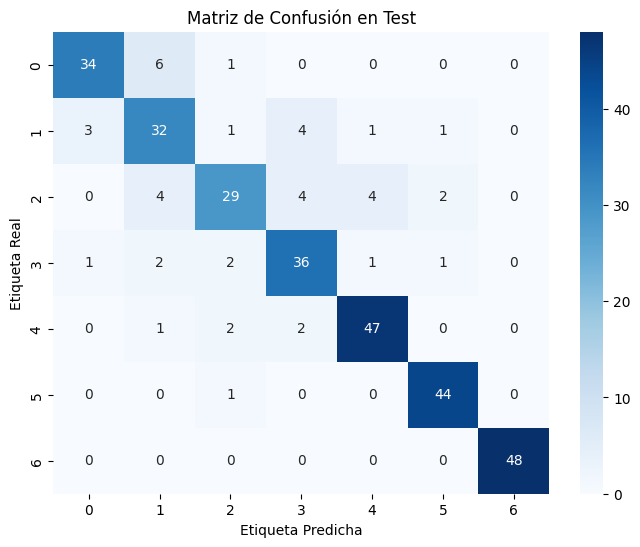

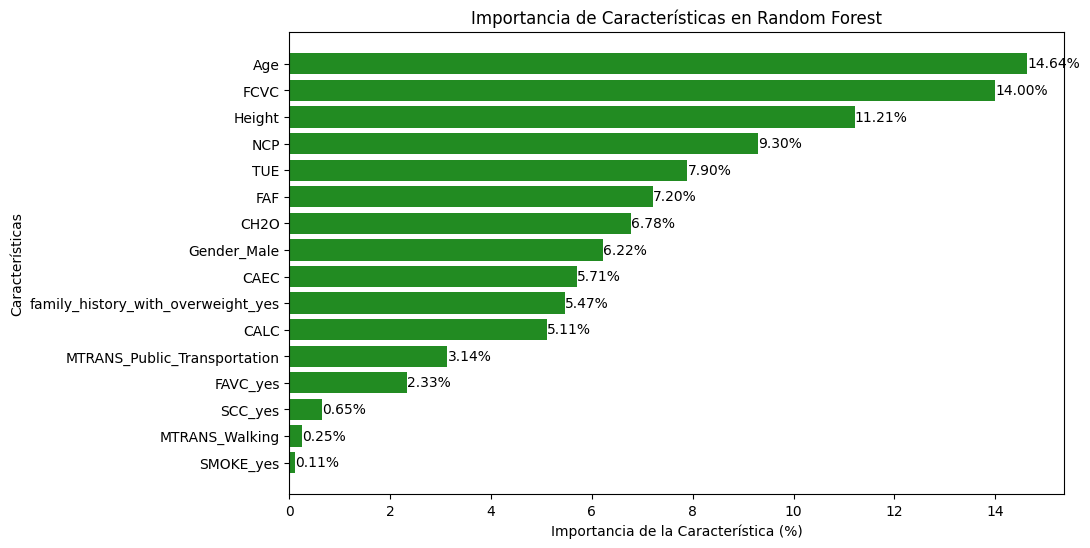

In [ ]:
# Predicciones en test
y_test_pred = best_rf.predict(X_test_scaled)

# Calcular la matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusi√≥n en Test")
plt.show()

# Importancia de variables usando el modelo Random Forest
importances = best_rf.feature_importances_

# Normalizar importancias para que sumen 100
importances = (importances / importances.sum()) * 100

# Obtener nombres de las variables
feature_names = X.columns

# Ordenar las caracter√≠sticas por importancia descendente
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importance = importances[indices]

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importance, color='forestgreen')
plt.xlabel("Importancia de la Caracter√≠stica (%)")
plt.ylabel("Caracter√≠sticas")
plt.title("Importancia de Caracter√≠sticas en Random Forest")
plt.gca().invert_yaxis()

# Agregar etiquetas num√©ricas a las barras
for bar, importance in zip(bars, sorted_importance):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}%', va='center')

plt.show()


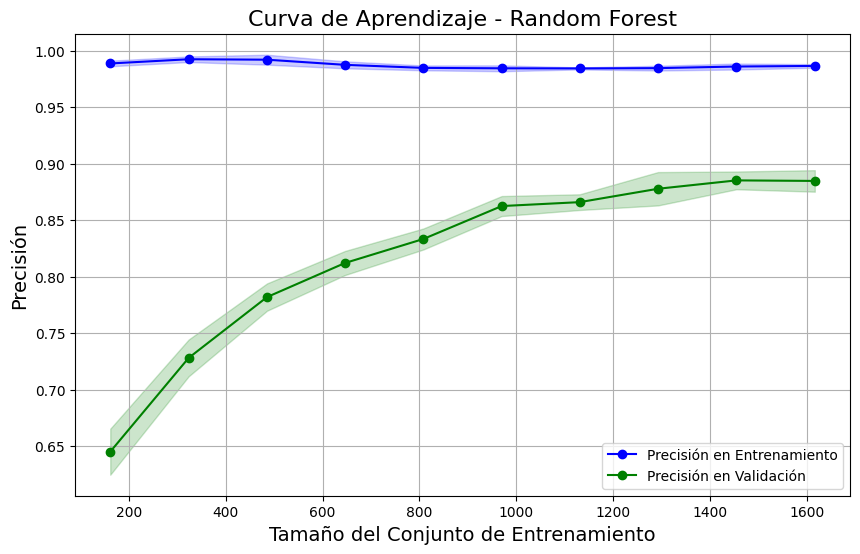

In [ ]:
# Calcular la curva de aprendizaje para el modelo Random Forest
train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_train_val, y_train_val, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calcular las medias y desviaciones est√°ndar de las puntuaciones
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))

# Curva de entrenamiento
plt.plot(train_sizes, train_mean, label="Precisi√≥n en Entrenamiento", color="blue", marker="o")

# Curva de validaci√≥n
plt.plot(train_sizes, val_mean, label="Precisi√≥n en Validaci√≥n", color="green", marker="o")

# Rellenar √°reas de error
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2)

# Etiquetas y t√≠tulo
plt.title("Curva de Aprendizaje - Random Forest", fontsize=16)
plt.xlabel("Tama√±o del Conjunto de Entrenamiento", fontsize=14)
plt.ylabel("Precisi√≥n", fontsize=14)
plt.legend(loc="best")
plt.grid(True)

# Mostrar gr√°fico
plt.show()


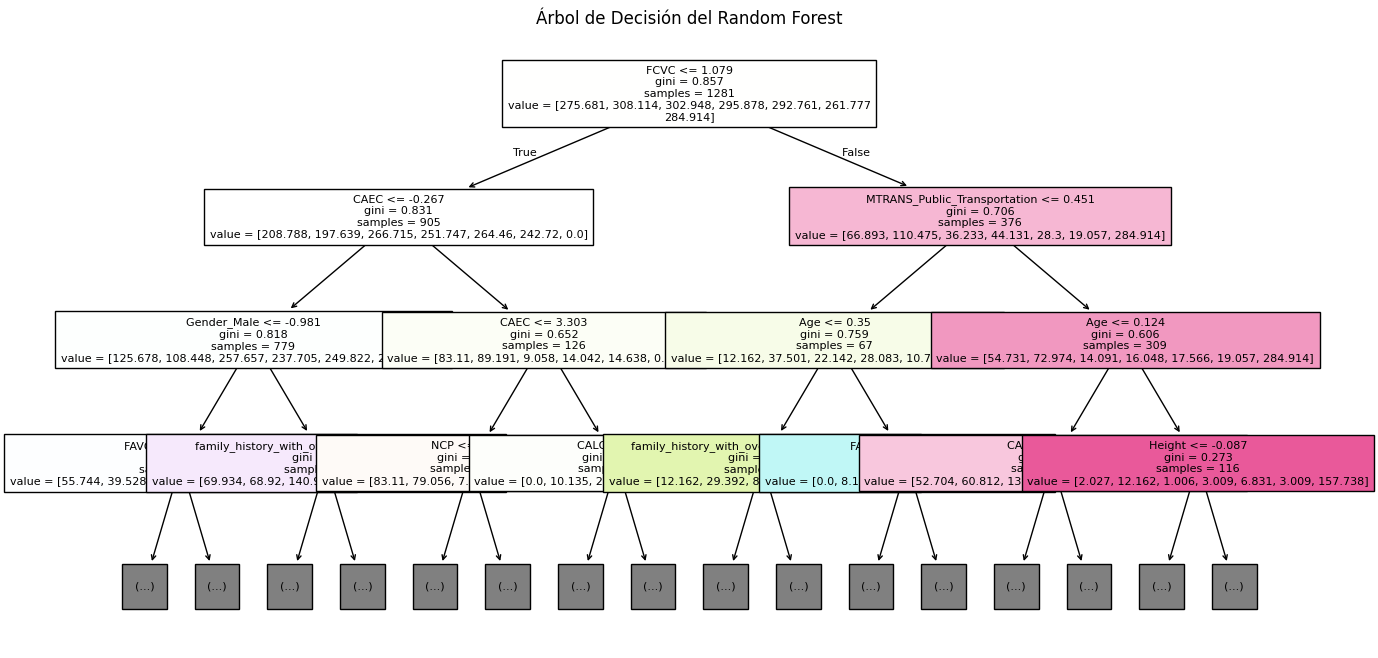

|--- FCVC <= 1.08
|   |--- CAEC <= -0.27
|   |   |--- Gender_Male <= -0.98
|   |   |   |--- FAVC_yes <= -2.07
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- FAVC_yes >  -2.07
|   |   |   |   |--- truncated branch of depth 10
|   |   |--- Gender_Male >  -0.98
|   |   |   |--- family_history_with_overweight_yes <= -0.18
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- family_history_with_overweight_yes >  -0.18
|   |   |   |   |--- truncated branch of depth 12
|   |--- CAEC >  -0.27
|   |   |--- CAEC <= 3.30
|   |   |   |--- NCP <= 0.40
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- NCP >  0.40
|   |   |   |   |--- truncated branch of depth 9
|   |   |--- CAEC >  3.30
|   |   |   |--- CALC <= 1.51
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- CALC >  1.51
|   |   |   |   |--- class: 4.0
|--- FCVC >  1.08
|   |--- MTRANS_Public_Transportation <= 0.45
|   |   |--- Age <= 0.35
|   |   |   |--- family_history_with_ove

In [ ]:
# Acceder al primer √°rbol en el bosque de Random Forest
arbol_ejemplo = best_rf.estimators_[0]

# Graficar el √°rbol
plt.figure(figsize=(15, 8))
plot_tree(arbol_ejemplo, feature_names=X.columns.tolist(), filled=True, fontsize=8, max_depth=3)
plt.title("√Årbol de Decisi√≥n del Random Forest")
plt.show()

# Exportar el √°rbol a texto (m√°xima profundidad de 3)
tree_text = export_text(arbol_ejemplo, feature_names=X.columns.tolist(), max_depth=3)
print(tree_text)


El modelo de Random Forest optimizado mediante GridSearch ha mostrado un rendimiento s√≥lido en t√©rminos generales, con una precisi√≥n del 98% en el conjunto de Entrenamiento + Validaci√≥n. Este alto rendimiento indica que el modelo ha aprendido bien las caracter√≠sticas de los datos y tiene una capacidad notable para predecir correctamente las clases en el conjunto de entrenamiento. Sin embargo, al aplicar el modelo al conjunto de Test, la precisi√≥n disminuye a 86%, lo que podr√≠a ser un indicio de sobreajuste. Aunque el desempe√±o sigue siendo bastante bueno, esta ca√≠da en la precisi√≥n sugiere que el modelo ha memorizado demasiado los detalles espec√≠ficos del conjunto de entrenamiento y, por lo tanto, no generaliza tan bien cuando se enfrenta a datos nuevos.

El reporte de clasificaci√≥n en el conjunto de Test muestra que el modelo logra buenos resultados en la mayor√≠a de las clases. Las clases 5 y 6, por ejemplo, tienen una precisi√≥n y recall elevados, lo que refleja un buen ajuste en esos casos. Sin embargo, algunas clases, como la 1, 2 y 3, presentan un desempe√±o m√°s bajo en t√©rminos de precisi√≥n y recall. Esto podr√≠a ser un reflejo de que el modelo ha tenido dificultades para aprender las caracter√≠sticas espec√≠ficas de estas clases, lo que tambi√©n puede ser consecuencia de un sobreajuste parcial a los datos de entrenamiento. A pesar de esto, el modelo mantiene una accuracy global de 84%, con una puntuaci√≥n f1 macro y ponderada de 0.84, lo que sigue indicando un rendimiento relativamente equilibrado y efectivo.

Para abordar el posible sobreajuste, ser√≠a recomendable seguir explorando opciones de optimizaci√≥n. Aunque los hiperpar√°metros ya est√°n ajustados, tal vez se podr√≠a experimentar con m√°s t√©cnicas de regularizaci√≥n, como la reducci√≥n de la complejidad de los √°rboles (por ejemplo, ajustando m√°s la profundidad m√°xima o aumentando el n√∫mero m√≠nimo de muestras por nodo). Adem√°s, aumentar el tama√±o del conjunto de entrenamiento o emplear t√©cnicas como el cross-validation podr√≠an ayudar a mejorar la capacidad de generalizaci√≥n del modelo. Estas estrategias ayudar√≠an a reducir la diferencia entre el rendimiento en entrenamiento y test, logrando un modelo m√°s robusto y generalizable.

#- K-NEAREST NEIGHBORS (KNN)

In [ ]:
# Definir el modelo KNN
knn_model = KNeighborsClassifier()

# Definir los valores de hiperpar√°metros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # N√∫mero de vecinos a considerar
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Diferentes m√©tricas de distancia
}

# Validaci√≥n cruzada con GridSearch en el conjunto de entrenamiento
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperpar√°metros encontrados
best_params = grid_search.best_params_
print("Mejores hiperpar√°metros:", best_params)

# Entrenar el mejor modelo con el conjunto de entrenamiento completo (train + validation)
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(np.vstack([X_train_scaled, X_val_scaled]), np.hstack([y_train, y_val]))

# Evaluaci√≥n final en el conjunto de prueba
y_test_pred = best_knn.predict(X_test_scaled)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))


Mejores hiperpar√°metros: {'metric': 'manhattan', 'n_neighbors': 3}
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        41
           1       0.61      0.48      0.53        42
           2       0.76      0.67      0.72        43
           3       0.79      0.77      0.78        43
           4       0.91      0.94      0.92        52
           5       0.92      0.98      0.95        45
           6       0.98      1.00      0.99        48

    accuracy                           0.83       314
   macro avg       0.81      0.82      0.81       314
weighted avg       0.82      0.83      0.82       314



In [ ]:
# Predecir para el conjunto de entrenamiento + validaci√≥n
y_train_val_pred = best_knn.predict(np.vstack([X_train_scaled, X_val_scaled]))

# Predecir para el conjunto de prueba
y_test_pred = best_knn.predict(X_test_scaled)

# Calcular precisi√≥n, recall y F1 score para el conjunto de entrenamiento + validaci√≥n
train_val_precision = precision_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_recall = recall_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')
train_val_f1 = f1_score(np.hstack([y_train, y_val]), y_train_val_pred, average='weighted')

# Calcular precisi√≥n, recall y F1 score para el conjunto de prueba
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Imprimir los resultados
print(f"Train + Validation Precision: {train_val_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train + Validation Recall: {train_val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Train + Validation F1 Score: {train_val_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

Train + Validation Precision: 0.9130
Test Precision: 0.8212
Train + Validation Recall: 0.9117
Test Recall: 0.8280
Train + Validation F1 Score: 0.9115
Test F1 Score: 0.8219


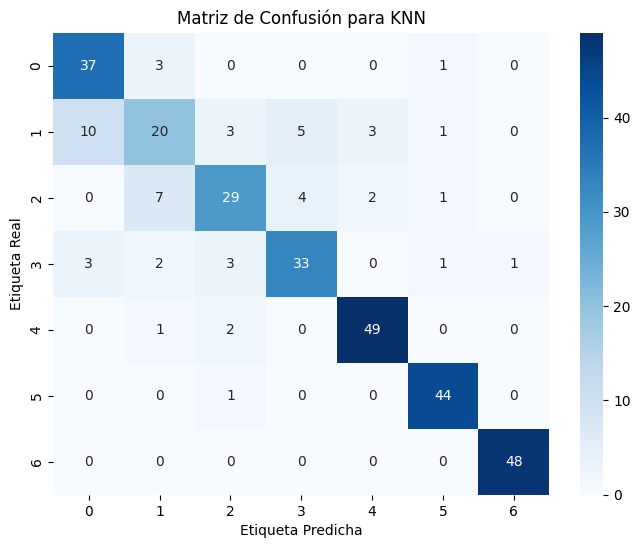

In [ ]:
# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusi√≥n para KNN")
plt.show()

In [ ]:
# Contar elementos por clase en el conjunto de prueba
class_counts = np.bincount(y_test)
print("Cantidad de muestras por clase en y_test:", class_counts)
# la clase que predice siempre peor es la 1 y la mejor la 4

Cantidad de muestras por clase en y_test: [41 42 43 43 52 45 48]


El modelo KNN muestra un rendimiento s√≥lido en general con una precisi√≥n del 83% en el conjunto de prueba. Sin embargo, tiene algunas dificultades al clasificar ciertas clases, especialmente la clase 1 (Normal Weight), que tiene un recall relativamente bajo de 0.52. Esto sugiere que el modelo tiende a confundir a las personas con peso normal con otras categor√≠as, lo cual podr√≠a ser un desaf√≠o debido a las similitudes entre las caracter√≠sticas de los diferentes niveles de obesidad o sobrepeso. A pesar de esto, el modelo logra una clasificaci√≥n perfecta para la clase 4 (Obesidad Tipo I), y un buen desempe√±o en otras clases, lo que indica que es efectivo para clasificar extremos del espectro de peso, aunque menos efectivo para las categor√≠as intermedias.

KNN no proporciona directamente una medida de importancia de variables como lo hacen otros modelos. Sin embargo, podemos analizar la importancia de las variables en KNN mediante permutaci√≥n de caracter√≠sticas, Se eval√∫a el impacto de cada variable elimin√°ndola o aleatoriz√°ndola y observando c√≥mo cambia la precisi√≥n.

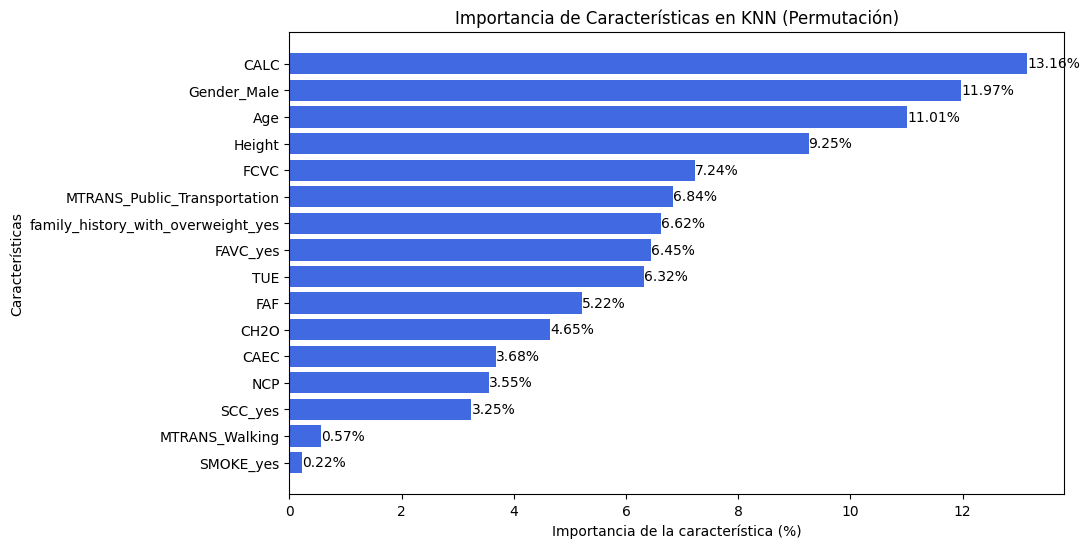

In [ ]:
# Importancia de variables usando permutaci√≥n
perm_importance = permutation_importance(best_knn, X_test_scaled, y_test, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean

# Normalizar importancias para que sumen 100
feature_importances = (feature_importances / feature_importances.sum()) * 100

# Obtener nombres de las variables
feature_names = X_test.columns

# Ordenar las caracter√≠sticas por importancia descendente
indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[indices]
sorted_importance = feature_importances[indices]

# Graficar la importancia de las variables en horizontal con valores num√©ricos
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importance, color='royalblue')
plt.xlabel("Importancia de la caracter√≠stica (%)")
plt.ylabel("Caracter√≠sticas")
plt.title("Importancia de Caracter√≠sticas en KNN (Permutaci√≥n)")
plt.gca().invert_yaxis()

# Agregar etiquetas num√©ricas a las barras
for bar, importance in zip(bars, sorted_importance):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}%', va='center')

plt.show()

Los valores num√©ricos que aparecen en la gr√°fica de importancia de caracter√≠sticas representan la media de la reducci√≥n en la precisi√≥n cuando se permuta aleatoriamente cada caracter√≠stica. ( le dije que los apsara  a % y saca eso, pero no es lo mismo q los otros modelos)

# Conclusiones

En nuestra investigaci√≥n para clasificar a personas seg√∫n su nivel de sobrepeso, hemos probado diversos modelos de machine learning, evaluando su rendimiento en funci√≥n de m√©tricas clave tanto en los conjuntos de entrenamiento como de prueba.

Cuando se incluye la variable `Weight` en el conjunto de datos, el SVM con regularizaci√≥n resulta ser el modelo m√°s s√≥lido y eficaz. Esta variable tiene un impacto considerable en el desempe√±o del modelo, mejorando su capacidad para clasificar correctamente los niveles de sobrepeso. Al incorporar esta caracter√≠stica, el SVM muestra un rendimiento sobresaliente, destac√°ndose tanto en la precisi√≥n durante el entrenamiento como en la prueba.

Sin embargo, si prescindimos de la variable `Weight`, el panorama cambia. En este caso, el Random Forest demuestra ser el modelo m√°s eficiente (aunque presenta algo de sobreajuste , podr√≠amos trabajar en perfilar y mejorar eso mediante m√°s t√©cnicas de regularizaci√≥n), ofreciendo un rendimiento equilibrado y consistente en ambas m√©tricas, lo que lo convierte en la opci√≥n m√°s recomendada para este problema sin depender de una variable clave. Adem√°s, Random Forest mantiene una alta precisi√≥n general, a pesar de no contar con una caracter√≠stica tan determinante como el peso.

El SVM con regularizaci√≥n sigue siendo una opci√≥n viable en este escenario, especialmente cuando se necesita un modelo m√°s sencillo y con menos complejidad. Aunque su rendimiento es s√≥lido, no alcanza el nivel de precisi√≥n del Random Forest.

El KNN, por su parte, tambi√©n es una opci√≥n razonable, pero presenta la necesidad de ajustes adicionales para optimizar su rendimiento. Si bien puede ser √∫til en algunos casos, no supera a los otros modelos mencionados en t√©rminos de rendimiento global.

Finalmente, el PMC mostr√≥ un desempe√±o inferior en comparaci√≥n con los dem√°s modelos, necesitando una mayor optimizaci√≥n para ser competitivo en esta tarea espec√≠fica de clasificaci√≥n del sobrepeso.

En resumen, Random Forest se destaca como el modelo con el mejor rendimiento general para clasificar el sobrepeso, especialmente en escenarios donde la variable `Weight` no est√° disponible. Sin embargo, si se requiere un modelo m√°s simple y directo, el SVM con regularizaci√≥n sigue siendo una excelente opci√≥n. Dependiendo de las necesidades espec√≠ficas del problema y los recursos disponibles, los otros modelos, como KNN o PMC, podr√≠an considerarse, pero con la necesidad de ajustes adicionales para mejorar su efectividad.